<h1 align="center"> Credit Fraud Detector </h1>

**Note:** There are still aspects of this kernel that will be subjected to changes. I've noticed a recent increase of interest towards this kernel so I will focus more on the steps I took and why I took them to make it clear why I took those steps.

<h2>Before we Begin:  </h2>
If you liked my work, please upvote this kernel since it will keep me motivated to perform more in-depth reserach towards this subject and will look for more efficient ways so that our models are able to detect more accurately both fraud and non-fraud transactions.

<h2> Introduction </h2>
In this kernel we will use various predictive models to see how accurate they  are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!


<h2> Our Goals: </h2>
<ul>
<li> Understand the little distribution of the "little" data that was provided to us. </li>
<li> Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm) </li>
<li> Determine the Classifiers we are going to use and decide which one has a higher accuracy. </li>
<li>Create a Neural Network and compare the accuracy to our best classifier. </li>
<li>Understand common mistaked made with imbalanced datasets. </li>
</ul>


<h2> Outline: </h2>
I. <b>Understanding our data</b><br>
a) [Gather Sense of our data](#gather)<br><br>

II. <b>Preprocessing</b><br>
a) [Scaling and Distributing](#distributing)<br>
b) [Splitting the Data](#splitting)<br><br>

III. <b>Random UnderSampling and Oversampling</b><br>
a) [Distributing and Correlating](#correlating)<br>
b) [Anomaly Detection](#anomaly)<br>
c) [Dimensionality Reduction and Clustering (t-SNE)](#clustering)<br>
d) [Classifiers](#classifiers)<br>
e) [A Deeper Look into Logistic Regression](#logistic)<br>
f) [Oversampling with SMOTE](#smote)<br><br>

IV. <b>Testing </b><br>
a) [Testing with Logistic Regression](#testing_logistic)<br>
b) [Neural Networks Testing (Undersampling vs Oversampling)](#neural_networks)

<h2>Correcting Previous Mistakes from Imbalanced Datasets: </h2>
<ul>
<li> Never test on the oversampled or undersampled dataset.</li>
<li>If we want to implement cross validation, remember to oversample or undersample your training data <b>during</b> cross-validation, not before! </li>
<li> Don't use <b>accuracy score </b> as a metric with imbalanced datasets (will be usually high and misleading), instead use <b>f1-score, precision/recall score or confusion matrix </b></li>
</ul>


<h2> References: </h2>
<ul>
<li>Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2017 Aurélien Géron  </li>
<li><a src="https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s" > Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn </a>by Coding-Maniac</li>
<li><a src="https://www.kaggle.com/lane203j/auprc-5-fold-c-v-and-resampling-methods"> auprc, 5-fold c-v, and resampling methods
</a> by Jeremy Lane (Kaggle Notebook) </li>
</ul>

## Gather Sense of Our Data:
<a id="gather"></a>
The first thing we must do is gather a <b> basic sense </b> of our data. Remember, except for the <b>transaction</b> and <b>amount</b> we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.   

<h3> Summary: </h3>
<ul>
<li>The transaction amount is relatively <b>small</b>. The mean of all the mounts made is approximately USD 88. </li>
<li>There are no <b>"Null"</b> values, so we don't have to work on ways to replace values. </li>
<li> Most of the transactions were <b>Non-Fraud</b> (99.83%) of the time, while <b>Fraud</b> transactions occurs (017%) of the time in the dataframe. </li>
</ul>

<h3> Feature Technicalities: </h3>
<ul>
<li> <b>PCA Transformation: </b>  The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).</li>
<li> <b>Scaling:</b> Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)</li>
</ul>

In [ ]:
!pip install imbalanced-ensemble
!pip uninstall scikit-learn --y
!pip install scikit-learn==1.2.2
!pip install imblearn
!pip install kaggle

  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Successfully uninstalled scikit-learn-1.4.2
  Using cached scikit_learn-1.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-ensemble 0.2.1 requires scikit-learn>=1.3.0, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import missingno as msno
import seaborn as sns

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import collections
from IPython import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import average_precision_score
from sklearn.model_selection import KFold, cross_val_predict
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, auc, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42

In [ ]:
url='https://drive.google.com/file/d/1C-c6nWYf71CMqeqkP6qq1BT5aslCjDAO/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Good No Null Values!
df.isnull().sum().max()

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset.' + ' Count: ' + str(df['Class'].value_counts()[0]))
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset.' + ' Count: ' + str(df['Class'].value_counts()[1]))

No Frauds 99.83 % of the dataset. Count: 284315
Frauds 0.17 % of the dataset. Count: 492


## Data Cleaning

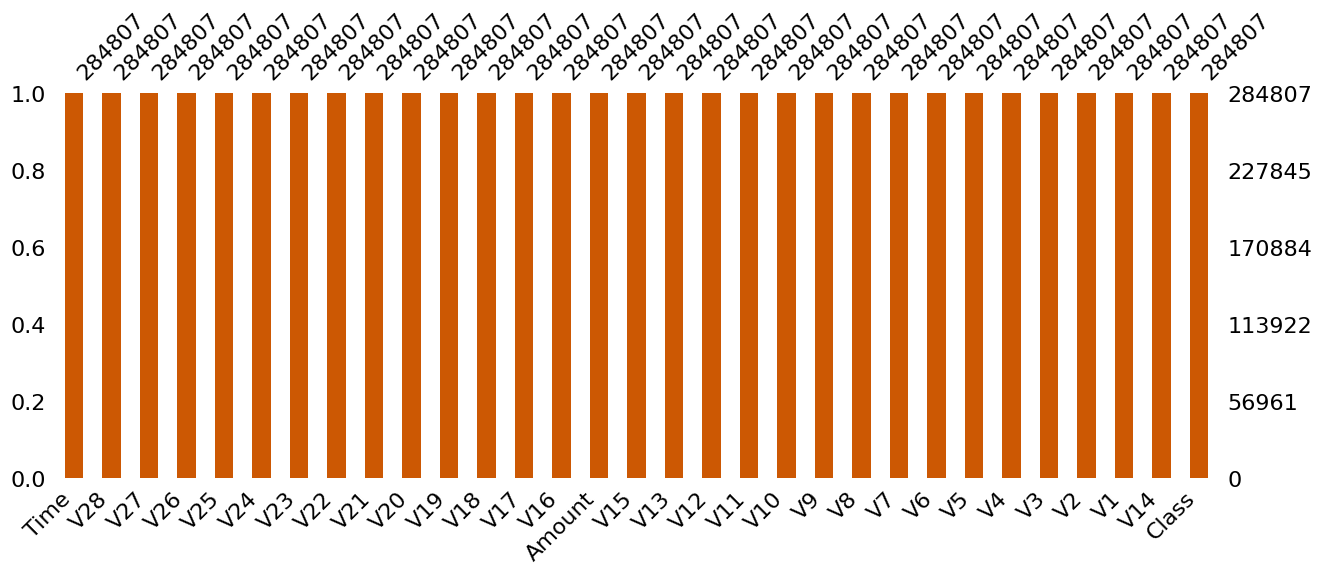

In [ ]:
plt.figure(figsize = (15, 8))
msno.bar(df, figsize = (15,5), sort = 'ascending', color = "#cc5803")
plt.show()

In [ ]:
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  1081


In [ ]:
# Step 1: Remove duplicates
df = df.drop_duplicates()

In [ ]:
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  0


In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset.' + ' Count: ' + str(df['Class'].value_counts()[0]))
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset.' + ' Count: ' + str(df['Class'].value_counts()[1]))

No Frauds 99.83 % of the dataset. Count: 283253
Frauds 0.17 % of the dataset. Count: 473


## Data Visualization

**Note:**  Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

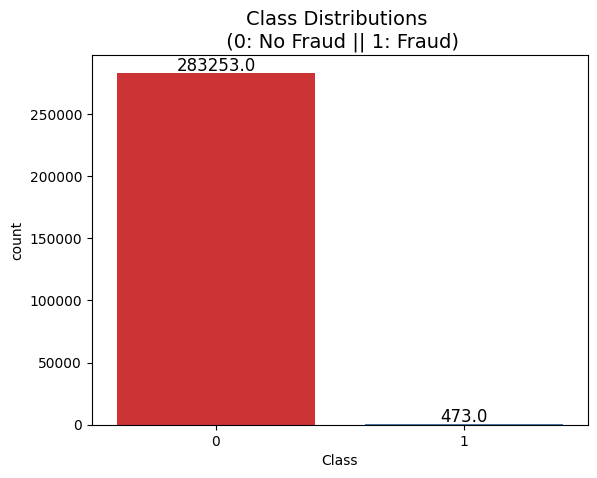

In [ ]:
colors = ["#0101DF", "#DF0101"]

ax = sns.countplot(x = 'Class', data=df, palette='Set1')

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set plot title
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Show plot
plt.show()

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

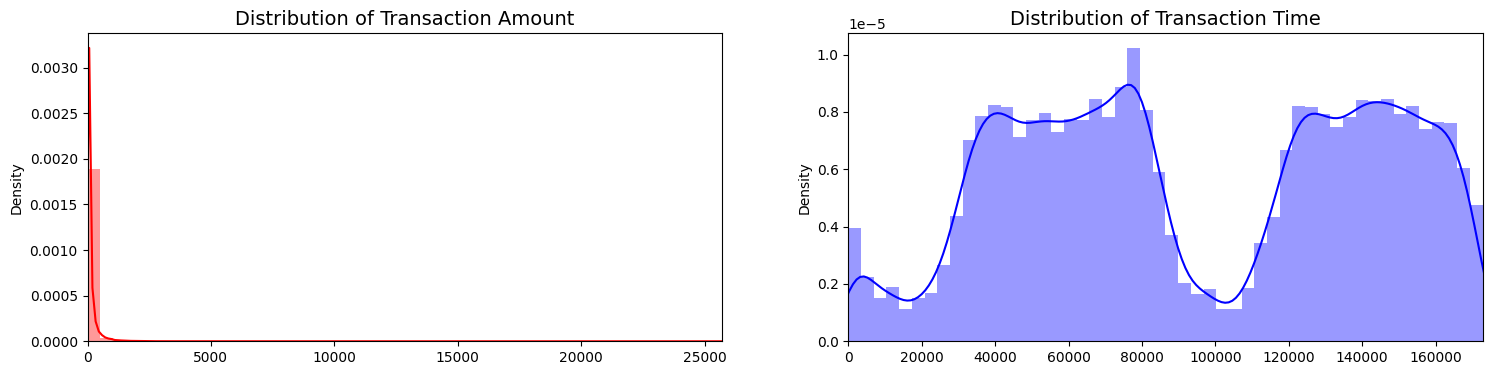

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

<h2> Scaling and Distributing </h2>
<a id="distributing"></a>
In this phase of our kernel, we will first scale the columns comprise of <b>Time</b> and <b>Amount </b>. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

<h3> What is a sub-Sample?</h3>
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

<h3> Why do we create a sub-Sample?</h3>
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

<h3>Summary: </h3>
<ul>
<li> <b>Scaled amount </b> and <b> scaled time </b> are the columns with scaled values. </li>
<li> There are <b>492 cases </b> of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. </li>
<li>We concat the 492 cases of fraud and non fraud, <b>creating a new sub-sample. </b></li>
</ul>

## Functions

In [ ]:
def plot_classification_report_heatmap(df, model_name):

  plt.figure(figsize=(13, 8))
  sns.heatmap(df.iloc[:3, :3], annot=True, cmap='Blues', fmt=".2f", cbar=True, linewidths=.5, vmin=0, vmax=1)
  sns.set(font_scale=1.1)
  plt.title(model_name + '\nclassification report heatmap', fontsize=18, pad=10, ha='center')
  plt.show()

  return

In [ ]:
def plot_classification_scores(df, model_name):

  data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'Score': [df.iloc[0,0], df.iloc[0,1], df.iloc[0,2]]
    }
  df = pd.DataFrame(data)

  # Plot the bar graph and show values on top of each bar
  plt.figure(figsize=(13, 8))
  ax = sns.barplot(x='Metric', y='Score', data=df, palette=['blue','green','orange'])
  sns.set(font_scale=1.1)

  # Annotate each bar with its value
  for p in ax.patches:
      ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')

  plt.title(model_name + '\nPrecision, Recall, and F1-Scores', fontsize=18, pad=20, ha='center')

  plt.ylim(0, 1)  # Set y-axis range to 0-1 for precision, recall, and F1-score
  plt.show()
  return

In [ ]:
confusion_labels = ['0', '1']

def confusion_plot(matrix, model_name, labels=None):

    """ Display binary confusion matrix as a Seaborn heatmap """

    labels = labels if labels else ['Negative (0)', 'Positive (1)']
    plt.figure(figsize = (13, 8))
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.heatmap(data=matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=labels, yticklabels=labels, ax=ax)
    sns.set(font_scale=1.1)
    ax.set_xlabel('PREDICTED', fontsize=16)
    ax.set_ylabel('ACTUAL', fontsize=16)
    plt.title(model_name + '\nconfusion matrix', fontsize=18, pad=10, ha='center')
    plt.close()

    return fig

In [ ]:
def append_model_to_table(tn, fp, fn, tp, clf_report, clf_name, execution_time, df):

    minutes = int(execution_time // 60)
    seconds = int(execution_time % 60)

    new_row = {
        'model': clf_name,
        'execution_Time': f"{minutes:02d}:{seconds:02d}",
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'precision': round(clf_report['Fraud']['precision'], 3),
        'recall': round(clf_report['Fraud']['recall'], 3),
        'f1': round(clf_report['Fraud']['f1-score'], 3),
        'support_Not_Fraud': int(clf_report['Not Fraud']['support']),
        'support_Fraud': int(clf_report['Fraud']['support'])
    }
    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    return df

In [ ]:
def classification_scores_comparison(df):
    # Example data
    models = df['model'].values
    precision_scores = df['precision'].values
    recall_scores = df['recall'].values
    f1_scores = df['f1'].values

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(30, 10))

    # Bar width
    bar_width = 0.2

    # Bar positions
    r1 = np.arange(len(models))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # Plot precision scores
    bars1 = ax.bar(r1, precision_scores, width=bar_width, label='Precision', color='blue')
    # Plot recall scores
    bars2 = ax.bar(r2, recall_scores, width=bar_width, label='Recall', color='green')
    # Plot F1 scores
    bars3 = ax.bar(r3, f1_scores, width=bar_width, label='F1 Score', color='orange')

    # Add labels, title, and legend
    ax.set_xticks([r + bar_width for r in range(len(models))])
    ax.set_xticklabels(models, fontsize=12)
    ax.set_xlabel('Models', fontsize=16)
    ax.set_ylabel('Scores', fontsize=16)
    ax.set_title('Comparison of Precision, Recall, and F1 Scores for each model', fontsize=18)
    ax.legend()

    # Annotate each bar with its value
    def annotate_bars(bars, scores):
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax.annotate(f'{score:.2f}',  # Text to display
                        xy=(bar.get_x() + bar.get_width() / 2, height),  # Position of text
                        xytext=(0, 3),  # Offset text above the bar
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    annotate_bars(bars1, precision_scores)
    annotate_bars(bars2, recall_scores)
    annotate_bars(bars3, f1_scores)

    # Show the plot
    plt.show()

    return

In [ ]:
def plot_compare_f1_scores(df):

    plt.figure(figsize=(13, 8))
    bars = plt.bar(df['model'], df['f1'], color='orange')
    plt.xlabel('Model', fontsize=16)
    plt.ylabel('F1 Score', fontsize=16)
    plt.title('Comparison of F1 Scores', fontsize=18)

    # Annotate each bar with its F1 score
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(round(height, 3)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    return
    #return round(precision, 3), round(recall, 3), round(f1, 3), round(aucprc, 3), round(gmean, 3), round(mcc, 3)

In [ ]:
def plot_samples_side_by_side(data1, data2, model_name):

    labels = ['Not Fraud', 'Fraud']

    # view previous class distribution
    print(data1.value_counts())

    # check new class counts
    print(data2.value_counts())

    # we set our y axis value as the number of rows of our original dataframe (for better understanding of sampling techniques)
    y_axis_value = X.shape[0]

    # Create pandas Series for data
    series1 = pd.Series(data1.value_counts(), name='Counts')
    series2 = pd.Series(data2.value_counts(), name='Counts')

    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))

    # Plot bar plot for data1
    bars1 = axs[0].bar(labels, series1, color=['#C8373A', '#4A7CA6'])
    axs[0].set_ylim(0, y_axis_value)
    axs[0].set_title('Train dataframe', fontsize=16)

    # Plot bar plot for data2
    bars2 = axs[1].bar(labels, series2, color=['#C8373A', '#4A7CA6'])
    axs[1].set_ylim(0, y_axis_value)
    axs[1].set_title('Resampled dataframe', fontsize=16)

    # Annotate each bar with its value for subplot 1
    for bar in bars1:
        height = bar.get_height()
        axs[0].annotate('{}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    # Annotate each bar with its value for subplot 2
    for bar in bars2:
        height = bar.get_height()
        axs[1].annotate('{}'.format(height),
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3),  # 3 points vertical offset
                       textcoords="offset points",
                       ha='center', va='bottom')

    # Set big title in the center
    plt.suptitle('Comparison of Samples\n' + model_name, fontsize=18, fontweight='bold')

    # Show plot
    plt.tight_layout()
    plt.show()
    return

In [ ]:
def calculate_auc_prc(y_test, y_proba):
      # Calculating AUCPRC score

      # Compute precision and recall values for different threshold values
      precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

      # Calculate the AUCPRC score
      auc_prc = auc(recall, precision)

      return auc_prc

# Function to calculate evaluation metrics
def calculate_metrics(y_test, y_pred, y_pred_proba):

    report = classification_report(y_test, y_pred, output_dict=True)
    precision = (round(report['1']['precision'], 3))
    recall = (round(report['1']['recall'], 3))
    f1 = (round(report['1']['f1-score'], 3))
    aucprc = (round(calculate_auc_prc(y_test, y_pred_proba), 3))
    gmean = (round(geometric_mean_score(y_test, y_pred), 3))
    mcc = (round(matthews_corrcoef(y_test, y_pred), 3))

    return precision, recall, f1, aucprc, gmean, mcc


def kfold_classifier(model_name, model, X, y, df):

    kfold = StratifiedKFold(n_splits=10, shuffle=True)

    # Initialize lists to store evaluation metrics
    precision_scores = []
    recall_scores = []
    f1_scores = []
    aucprc_scores = []
    gmean_scores = []
    mcc_scores = []

    # Perform k-fold cross-validation and compute evaluation metrics for each fold
    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Fit the classifier and make predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Calculate evaluation metrics for the current fold
        precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)
        # Append metrics to the respective lists
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        aucprc_scores.append(aucprc)
        gmean_scores.append(gmean)
        mcc_scores.append(mcc)

    # Calculate the mean classification report across all folds
    mean_precision = round(np.mean(precision_scores), 3)
    mean_recall = round(np.mean(recall_scores), 3)
    mean_f1 = round(np.mean(f1_scores), 3)
    mean_aucprc = round(np.mean(aucprc_scores), 3)
    mean_gmean = round(np.mean(gmean_scores), 3)
    mean_mcc = round(np.mean(mcc_scores), 3)

    std_precision = round(np.std(precision_scores), 3)
    std_recall = round(np.std(recall_scores), 3)
    std_f1 = round(np.std(f1_scores), 3)
    std_aucprc = round(np.std(aucprc_scores), 3)
    std_gmean = round(np.std(gmean_scores), 3)
    std_mcc = round(np.std(mcc_scores), 3)

    print(f1_scores)

    new_row = {
    'model': model_name,
    'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
    'f1': str(mean_f1) + ' ± ' + str(std_f1),
    'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
    'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
    'precision': str(mean_precision) + ' ± ' + str(std_precision),
    'recall': str(mean_recall) + ' ± ' + str(std_recall)
    }

    df = pd.concat([df, pd.DataFrame(new_row, index=[0])], ignore_index=True)

    return df


In [ ]:
df_models = pd.DataFrame(columns=['model', 'execution_Time', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect', 'precision', 'recall', 'f1', 'support_Not_Fraud', 'support_Fraud'])

In [ ]:
df_kfold_models = pd.DataFrame(columns=['model', 'aucprc', 'f1', 'gm', 'mcc', 'precision', 'recall'])

## Data Preprocessing

In [ ]:
'''
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
'''

"\n# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)\nfrom sklearn.preprocessing import StandardScaler, RobustScaler\n\n# RobustScaler is less prone to outliers.\n\nstd_scaler = StandardScaler()\nrob_scaler = RobustScaler()\n\ndf['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))\ndf['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))\n\ndf.drop(['Time','Amount'], axis=1, inplace=True)\n"

In [ ]:
'''
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()
'''

"\nscaled_amount = df['scaled_amount']\nscaled_time = df['scaled_time']\n\ndf.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)\ndf.insert(0, 'scaled_amount', scaled_amount)\ndf.insert(1, 'scaled_time', scaled_time)\n\n# Amount and Time are Scaled!\n\ndf.head()\n"

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = df.Class)

In [ ]:
X.shape

(283726, 30)

## Best parameters Search

In [ ]:
#XGBClassifier(colsample_bytree = 1, gamma = 0.1, learning_rate = 0.2, max_depth = 5, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE) -> 0.870 ans spec with 0.874 ± 0.033
#XGBClassifier(colsample_bytree = 1, gamma = 0.1, learning_rate = 0.2, max_depth = 7, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE) ->  0.835 and spec with 0.863 ± 0.024
#XGBClassifier(colsample_bytree = 1, gamma = 0.1, learning_rate = 0.3, max_depth = 7, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE) -> 0.832 and spec with 0.872 ± 0.028, 0.877 and spec with 0.87 ± 0.043, 0.867 and spec with 0.865 ± 0.028
#XGBClassifier(colsample_bytree = 1, gamma = 0.1, learning_rate = 0.3, max_depth = 10, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE) -> 0.842 and spec with 0.868 ± 0.032
'''from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100],
    'max_depth': [5, 7, 10],
    'colsample_bytree': [1],
    'gamma': [0.0, 0.05, 0.1, 0.2],
    'scale_pos_weight' : [1]
    # Add more parameters to tune
}

# Perform grid search
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Evaluate the model
best_f1_score = grid_search.best_score_

print(best_params)
print(best_f1_score)'''

"from sklearn.model_selection import GridSearchCV\nfrom xgboost import XGBClassifier\n\n# Define the parameter grid\nparam_grid = {\n    'learning_rate': [0.01, 0.1, 0.2, 0.3],\n    'n_estimators': [100],\n    'max_depth': [5, 7, 10],\n    'colsample_bytree': [1],\n    'gamma': [0.0, 0.05, 0.1, 0.2],\n    'scale_pos_weight' : [1]\n    # Add more parameters to tune\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='f1')\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nbest_params = grid_search.best_params_\n\n# Evaluate the model\nbest_f1_score = grid_search.best_score_\n\nprint(best_params)\nprint(best_f1_score)"

## Model Building

In [ ]:
#rf = RandomForestClassifier(n_estimators = 15, n_jobs = -1, random_state = 42)
#lgbm = LGBMClassifier(boosting_type = 'gbdt',objective = 'binary', random_state = 8888)
#xgb = XGBClassifier(colsample_bytree = 1, gamma = 0.1, learning_rate = 0.3, max_depth = 7, n_estimators = 100, scale_pos_weight = 1, random_state = RANDOM_STATE)
#logreg = LogisticRegression(solver = 'liblinear', random_state = 42)
gbdt = GradientBoostingClassifier()

classifiers = []
#classifiers.append((rf, 'Random Forest Classifier'))
#classifiers.append((lgbm, 'LGBM Classifier'))
#classifiers.append((xgb, 'XGBoost Classifier'))
#classifiers.append((logreg, 'Logistic Regression Classifier'))
classifiers.append((gbdt, 'Gradient Boosting Decision Tree'))

In [ ]:
for tuple in classifiers:

    start_time = time.time()
    tuple[0].fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    y_pred = tuple[0].predict(X_test)
    clf_report = classification_report(y_pred, y_test, target_names=['Not Fraud','Fraud'], output_dict=True)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    df_models = append_model_to_table(tn, fp, fn, tp, clf_report, tuple[1], execution_time, df_models)
    df_kfold_models = kfold_classifier(tuple[1], tuple[0], X, y, df_kfold_models)

[0.729, 0.675, 0.323, 0.787, 0.795, 0.317, 0.169, 0.674, 0.388, 0.841]


In [ ]:
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53


In [ ]:
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245


In [ ]:
df_models_result = df_models.iloc[:, [ 0, 8, 9, 10]]
df_models_result

,model,precision,recall,f1
0,Gradient Boosting Decision Tree,0.453,0.811,0.581


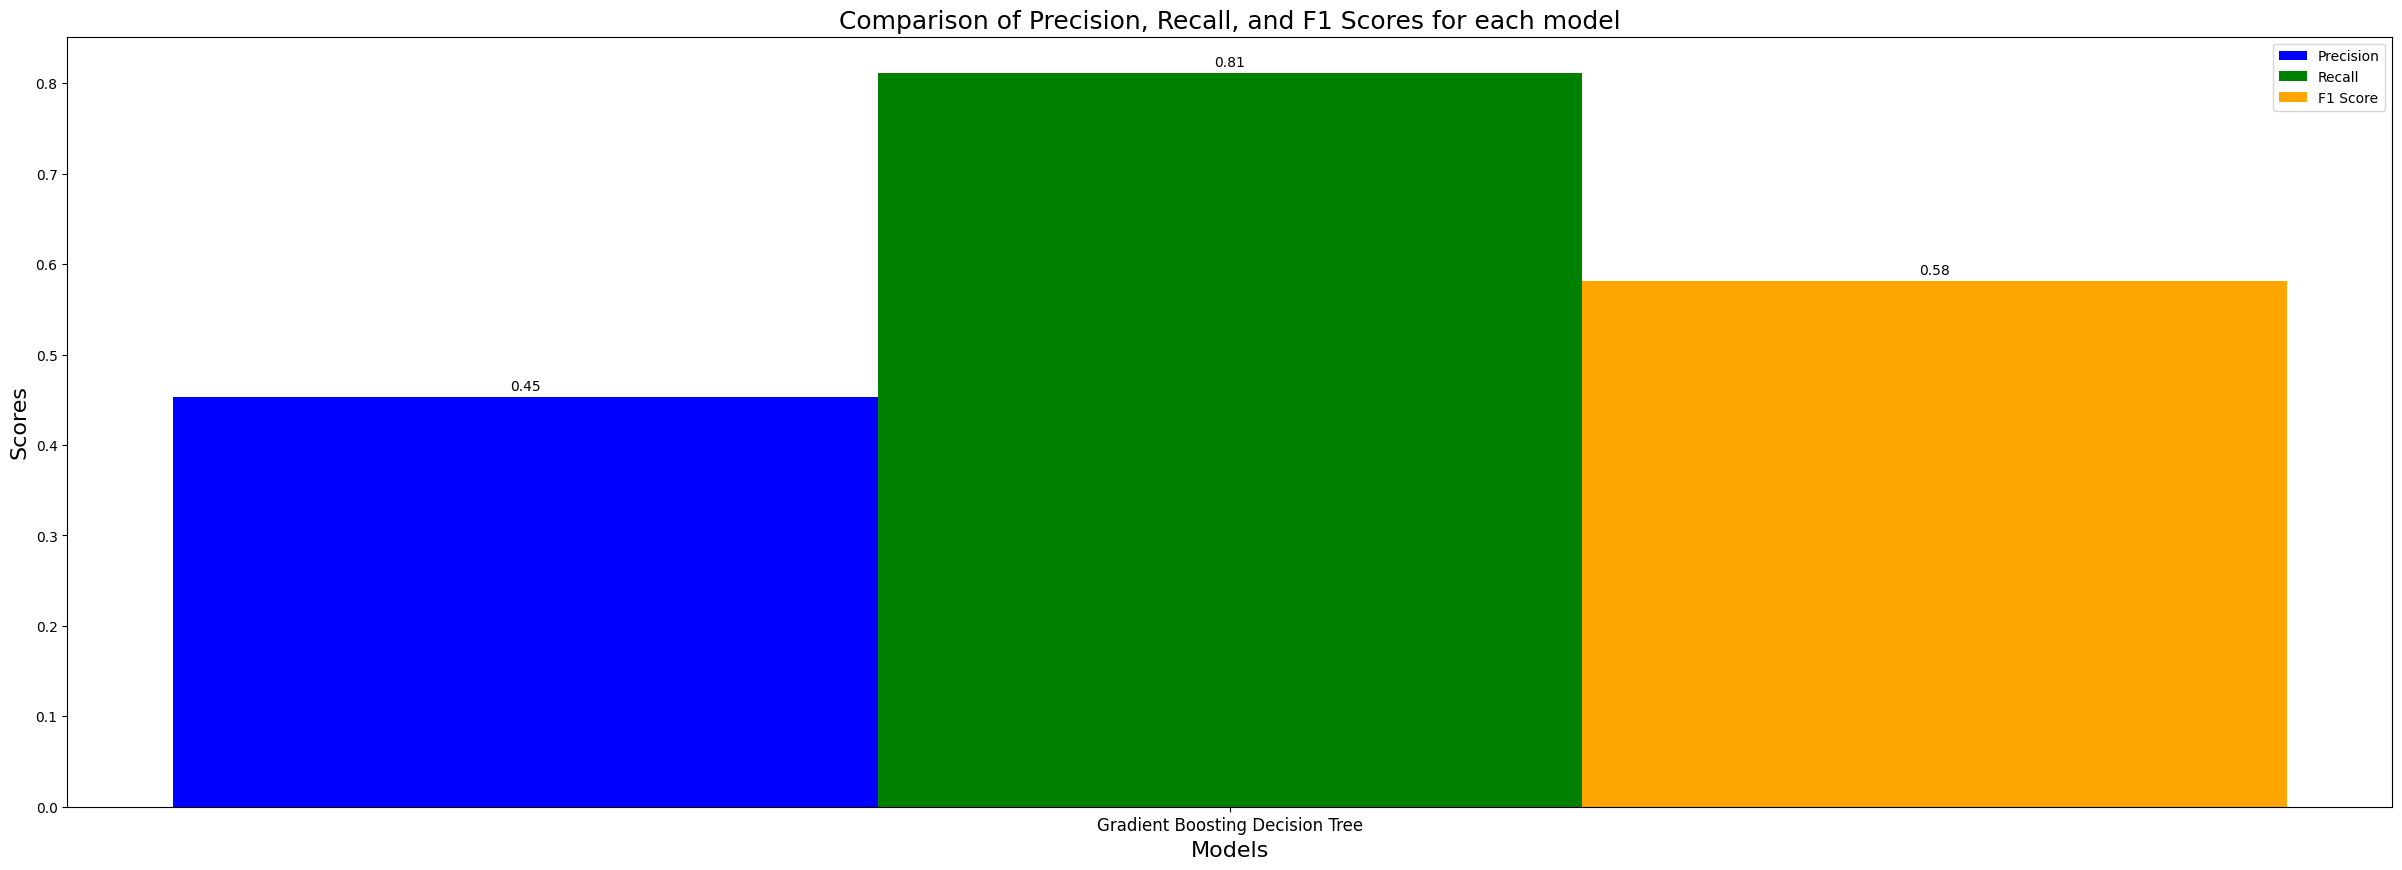

In [ ]:
classification_scores_comparison(df_models_result)

In [ ]:
df_models_f1_scores = df_models_result.iloc[:,[0, 3]]
df_models_f1_scores_sorted = df_models_f1_scores.sort_values(by='f1', ascending=True)

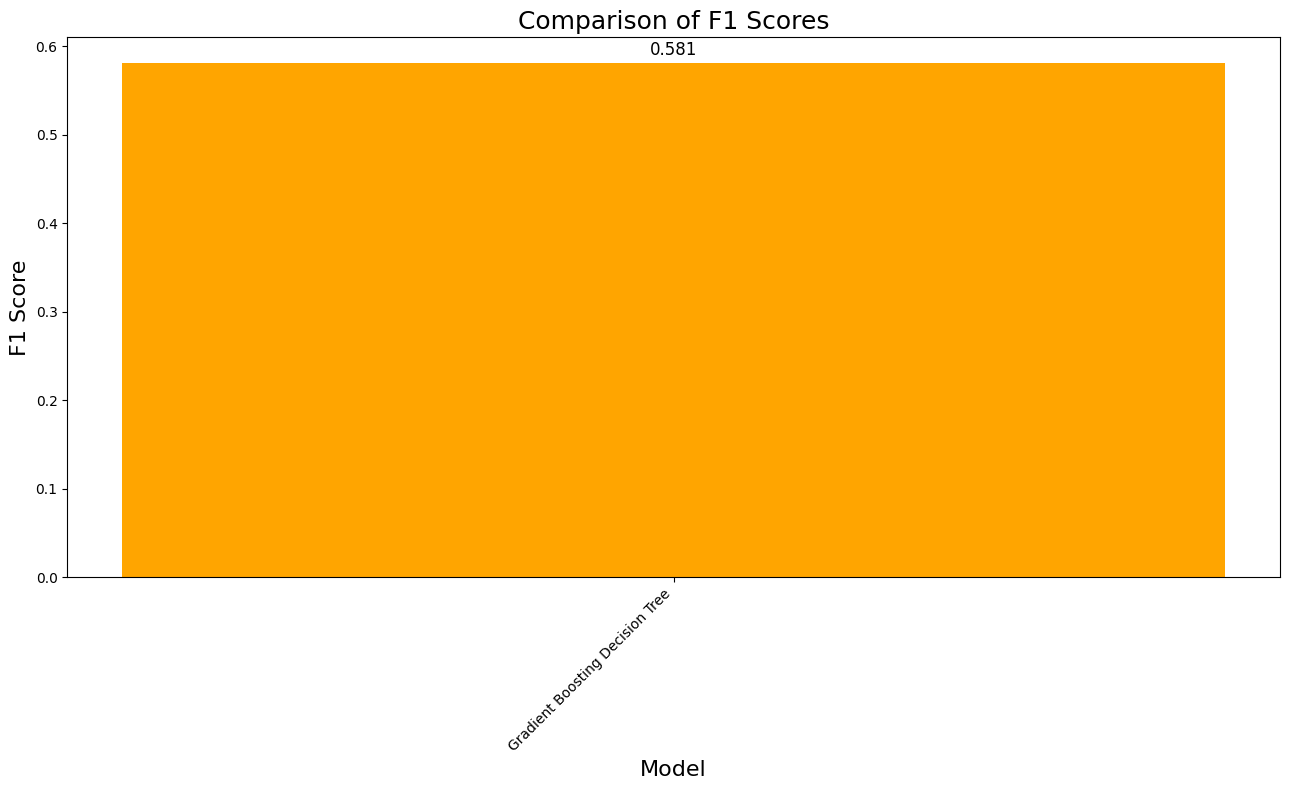

In [ ]:
plot_compare_f1_scores(df_models_f1_scores_sorted)

## Methods for Dealing with Imbalanced Data

###Resampling Techniques — Oversampling Minority Class w/ Gradient Boosting Decision Tree Classifier

In [ ]:
from sklearn.utils import resample

model_name = 'Oversampling Minority Class GBDT'

gbdt = GradientBoostingClassifier(n_estimators=100)

X = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = df.Class)

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
# concatenate our training data back together
data = pd.concat([X_train, y_train], axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223757,143508.0,2.118910,-0.171165,-3.539983,-1.077125,2.960850,2.697198,0.161806,0.497369,0.052809,...,0.145616,0.449322,-0.002206,0.759931,0.474691,0.261310,-0.067025,-0.085431,3.78,0
130169,79299.0,1.225606,-0.549656,0.753306,-0.899120,-1.166719,-0.359011,-0.815195,0.245952,1.880237,...,-0.004692,0.106227,-0.065198,-0.026308,0.447711,-0.677141,0.076618,0.017591,1.00,0
4651,4033.0,1.087887,0.176626,0.647825,1.771973,-0.519660,-0.791770,0.095238,-0.241606,1.628024,...,-0.232948,-0.364416,-0.079264,0.647468,0.632886,-0.404546,-0.015861,0.024105,59.90,0
210333,137933.0,2.259633,-1.384825,-1.124384,-1.585340,-1.021877,-0.509688,-0.999451,-0.208679,-1.288252,...,-0.157688,-0.000220,0.229545,0.594299,-0.146981,-0.187791,0.003882,-0.040883,41.50,0
50479,44507.0,-0.248208,1.132451,1.998465,3.048829,-0.102260,0.220359,0.527791,0.030240,-1.149039,...,-0.140369,-0.273110,0.072577,0.394881,-0.547636,-0.016875,0.175410,0.169490,35.24,0


In [ ]:
# separate minority and majority classes
not_fraud = data[data.Class==0]
fraud = data[data.Class==1]

# upsample minority
start_time_1 = time.time()
fraud_oversampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=42) # reproducible results
end_time_1 = time.time()

# combine majority and upsampled minority
oversampled = pd.concat([not_fraud, fraud_oversampled])

Class
0    226602
1       378
Name: count, dtype: int64
Class
0    226602
1    226602
Name: count, dtype: int64


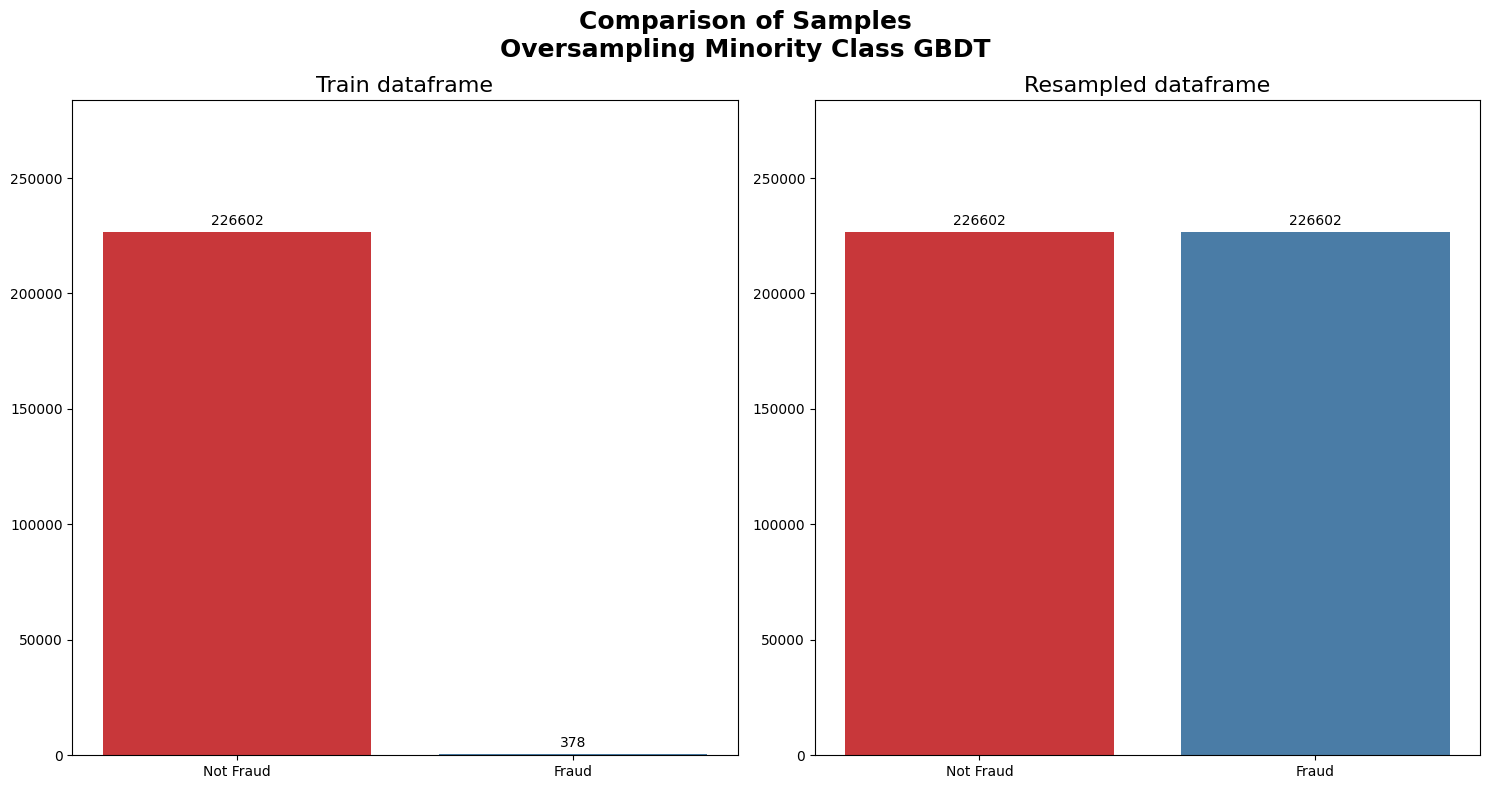

In [ ]:
plot_samples_side_by_side(y_train, oversampled.Class, model_name)

In [ ]:
# trying GBDT again with the balanced dataset

y_train_oversampled = oversampled.Class
X_train_oversampled = oversampled.drop('Class', axis=1)

start_time_2 = time.time()
oversampled = gbdt.fit(X_train_oversampled, y_train_oversampled)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

oversampled_pred = oversampled.predict(X_test)

In [ ]:
oversampled_report = classification_report(y_test, oversampled_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_oversampled = pd.DataFrame(oversampled_report).transpose()
df_oversampled = df_oversampled.drop('macro avg', axis=0)
df_oversampled = df_oversampled.drop('weighted avg', axis=0)
df_oversampled = df_oversampled.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     56651
       Fraud       0.18      0.85      0.30        95

    accuracy                           0.99     56746
   macro avg       0.59      0.92      0.65     56746
weighted avg       1.00      0.99      1.00     56746



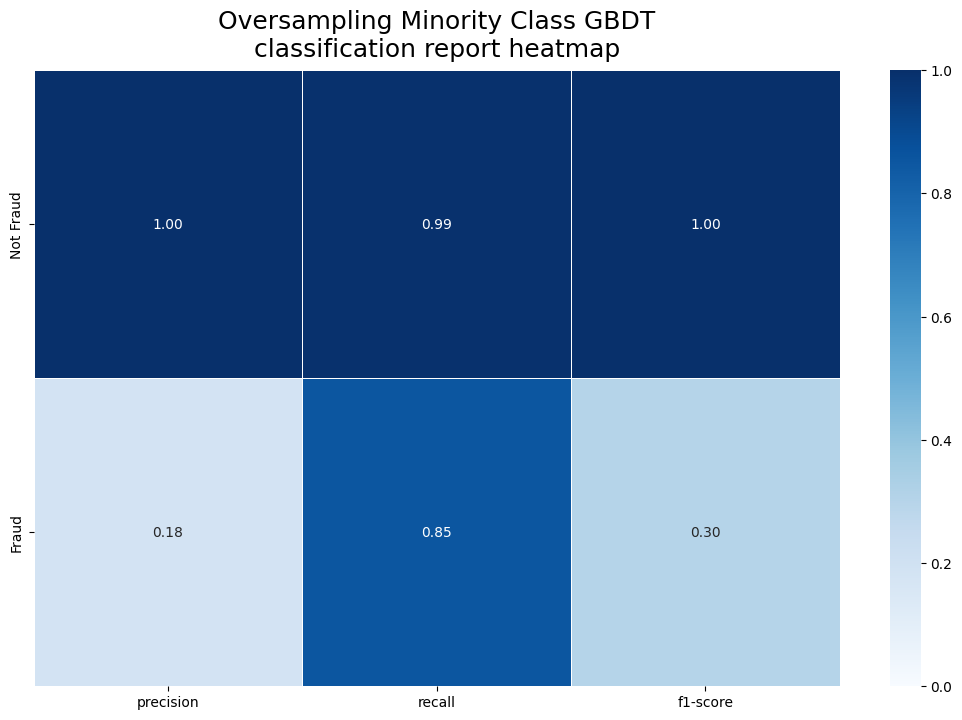

In [ ]:
print(classification_report(y_test, oversampled_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_oversampled, model_name)

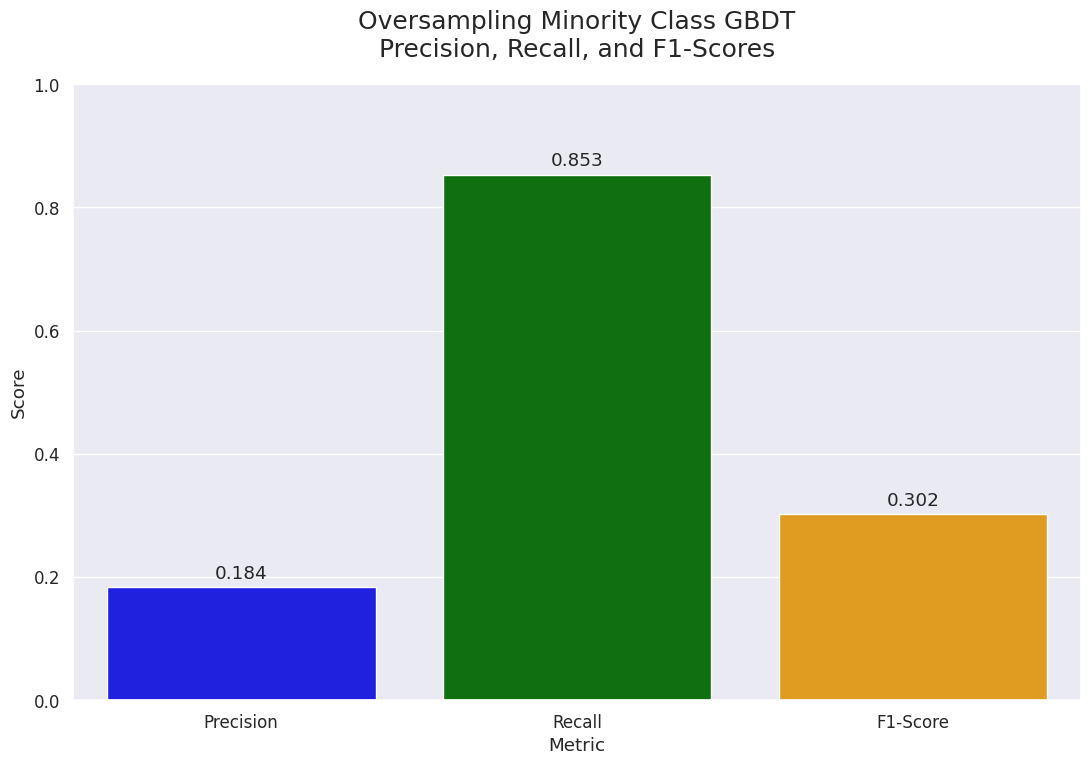

In [ ]:
df_oversampled = df_oversampled.drop('Not Fraud', axis=0)
df_oversampled = df_oversampled.drop('support', axis=1)

plot_classification_scores(df_oversampled, model_name)

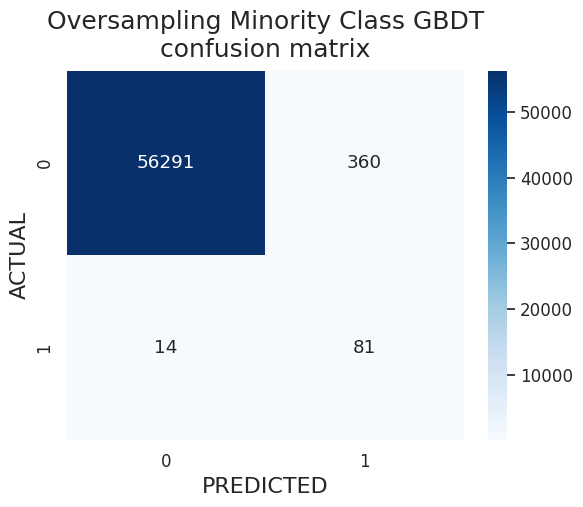

<Figure size 1300x800 with 0 Axes>

In [ ]:
# Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, oversampled_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, oversampled_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, oversampled_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95


In [ ]:
# K-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply oversampling to the training folds
    fraud_oversampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=42)

    y_train_oversampled = fraud_oversampled.Class
    X_train_oversampled = fraud_oversampled.drop('Class', axis=1)

    # Fit the classifier and make predictions
    gbdt.fit(X_train, y_train)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208


### Resampling techniques — Undersampling Majority Class w/ Gradient Boosting Decision Tree Classifier

In [ ]:
model_name = 'Undersampling Majority Class GBDT'

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = df.Class)

# still using our separated classes fraud and not_fraud from above

# downsample majority
start_time_1 = time.time()
not_fraud_undersampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results
end_time_1 = time.time()

# combine minority and downsampled majority
undersampled = pd.concat([not_fraud_undersampled, fraud])

Class
0    254928
1       426
Name: count, dtype: int64
Class
0    378
1    378
Name: count, dtype: int64


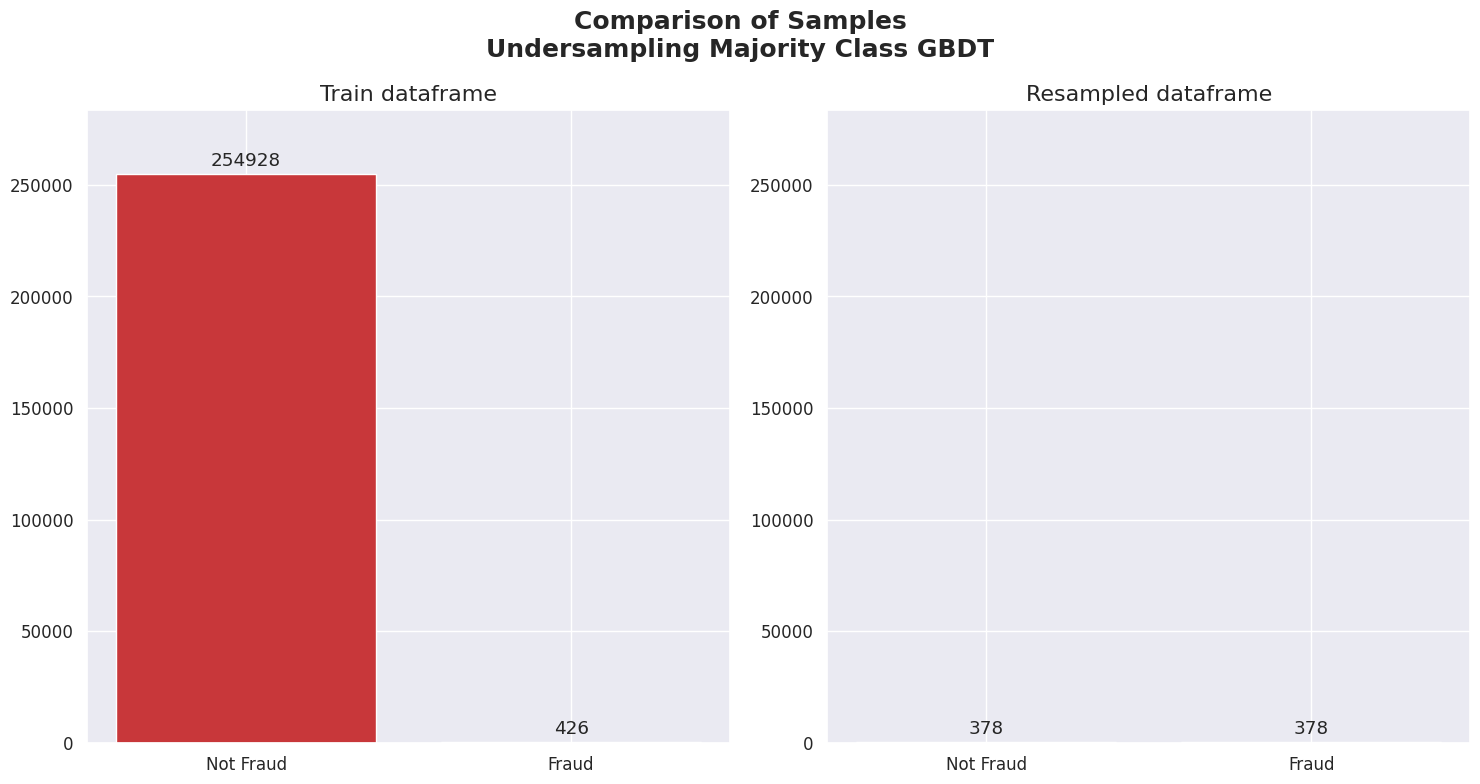

In [ ]:
plot_samples_side_by_side(y_train, undersampled.Class, model_name)

In [ ]:
# trying GBDT again with the undersampled dataset

y_train_undersampled = undersampled.Class
X_train_undersampled = undersampled.drop('Class', axis=1)

start_time_2 = time.time()
undersampled = gbdt.fit(X_train_undersampled, y_train_undersampled)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

undersampled_pred = undersampled.predict(X_test)

In [ ]:
undersampled_report = classification_report(y_test, undersampled_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_undersampled = pd.DataFrame(undersampled_report).transpose()
df_undersampled = df_undersampled.drop('macro avg', axis=0)
df_undersampled = df_undersampled.drop('weighted avg', axis=0)
df_undersampled = df_undersampled.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.98     28325
       Fraud       0.05      0.98      0.09        47

    accuracy                           0.97     28372
   macro avg       0.52      0.97      0.54     28372
weighted avg       1.00      0.97      0.98     28372



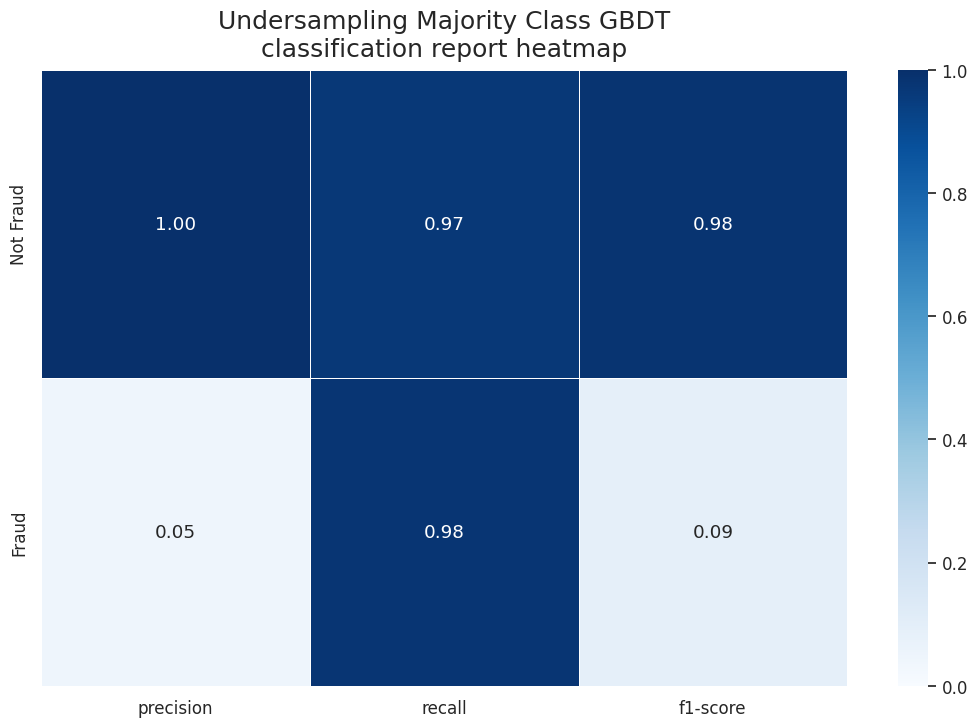

In [ ]:
print(classification_report(y_test, undersampled_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_undersampled, model_name)

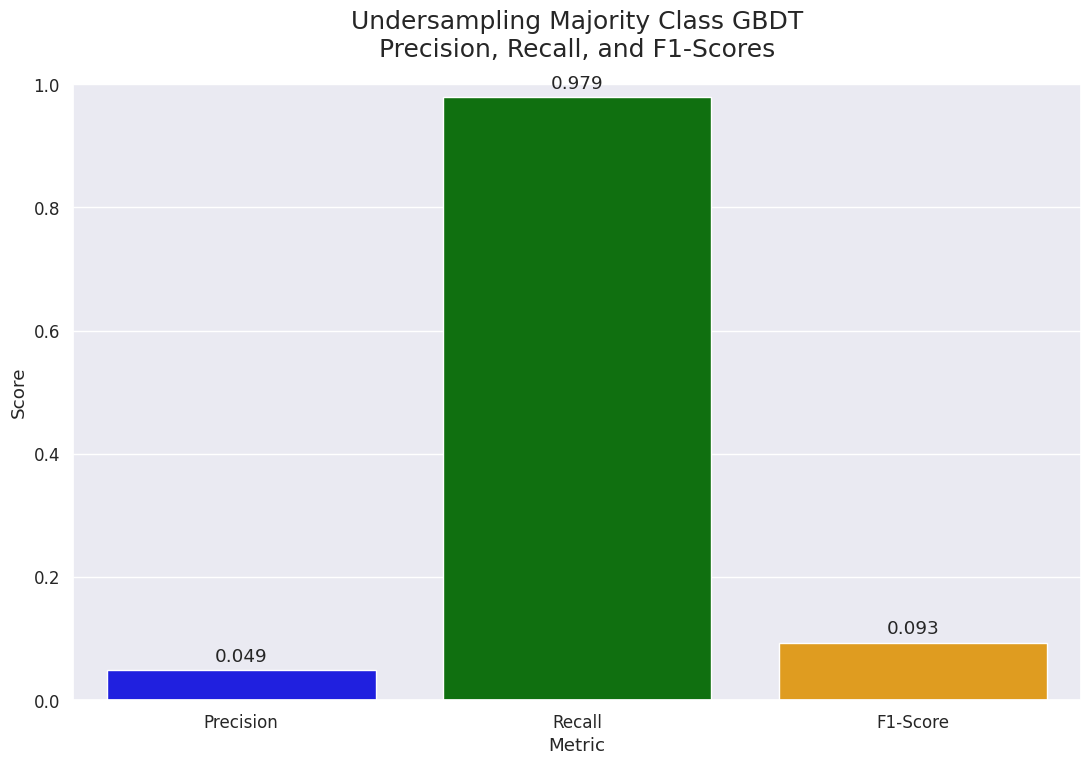

In [ ]:
df_undersampled = df_undersampled.drop('Not Fraud', axis=0)
df_undersampled = df_undersampled.drop('support', axis=1)

plot_classification_scores(df_undersampled, model_name)

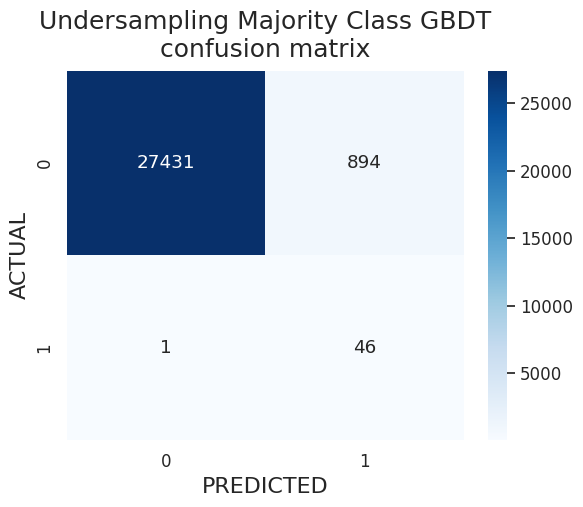

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, undersampled_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, undersampled_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, undersampled_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47


In [ ]:
# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply undersampling to the training folds
    not_fraud_undersampled = resample(not_fraud,
                                    replace = False, # sample without replacement
                                    n_samples = len(fraud), # match minority n
                                    random_state = 27) # reproducible results

    undersampled = pd.concat([not_fraud_undersampled, fraud])

    y_train_undersampled = undersampled.Class
    X_train_undersampled = undersampled.drop('Class', axis=1)

    # Fit the classifier and make predictions
    gbdt.fit(X_train_undersampled, y_train_undersampled)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208
2,Undersampling Majority Class GBDT,0.691 ± 0.074,0.09 ± 0.009,0.971 ± 0.014,0.211 ± 0.01,0.048 ± 0.005,0.975 ± 0.027


## Synthetic Minority Oversampling Technique (SMOTE) w/ Gradient Boosting Decision Tree Classifier

In [ ]:
from imblearn.over_sampling import SMOTE

model_name = 'SMOTE GBDT'

X = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = df.Class)

sm = SMOTE(sampling_strategy='auto')

start_time_1 = time.time()
X_smoteTrain, y_smoteTrain = sm.fit_resample(X_train, y_train)
end_time_1 = time.time()

Class
0    226602
1       378
Name: count, dtype: int64
Class
0    226602
1    226602
Name: count, dtype: int64


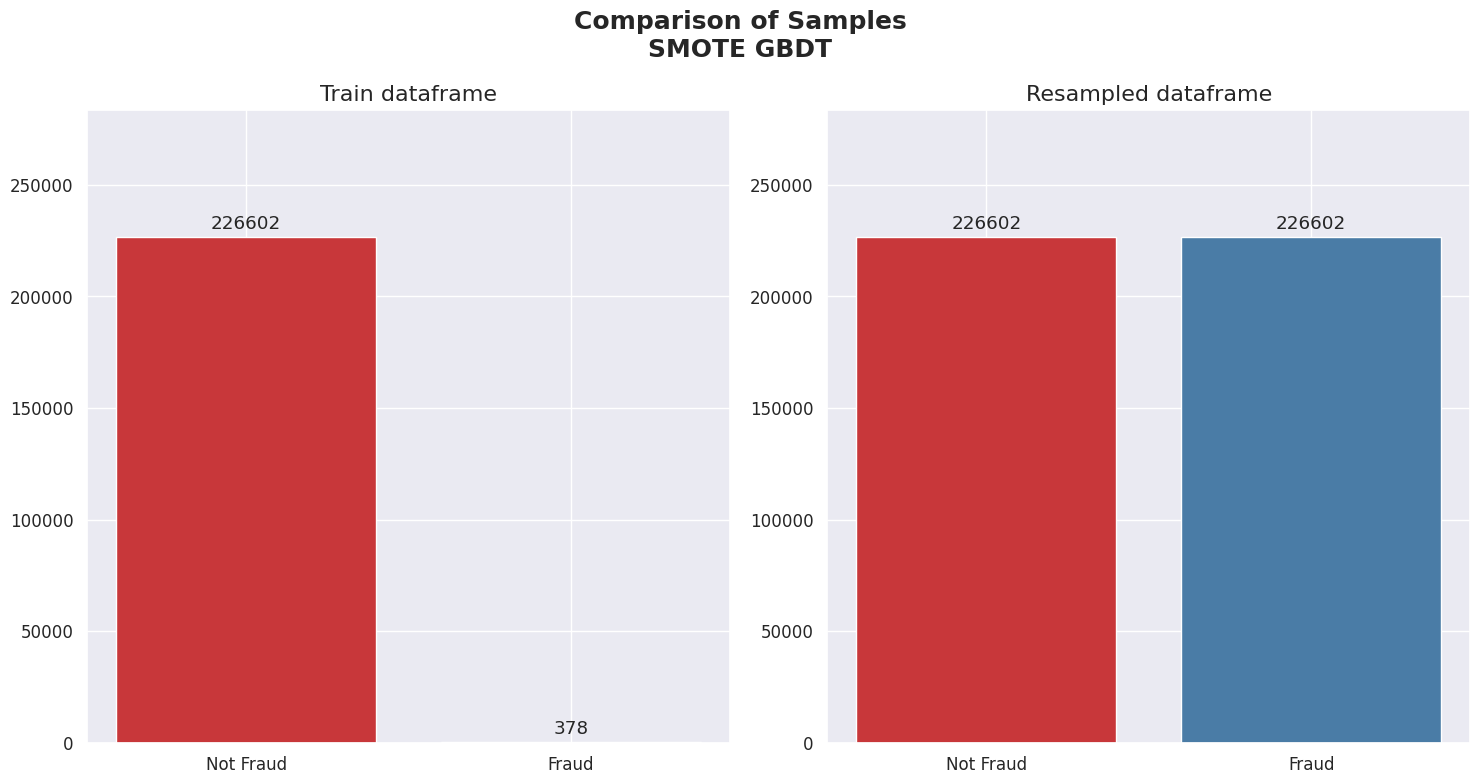

In [ ]:
plot_samples_side_by_side(y_train, y_smoteTrain, model_name)

In [ ]:
start_time_2 = time.time()
smote = gbdt.fit(X_smoteTrain, y_smoteTrain)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

smote_pred = smote.predict(X_test)

In [ ]:
smote_report = classification_report(y_test, smote_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_smote = pd.DataFrame(smote_report).transpose()
df_smote = df_smote.drop('macro avg', axis=0)
df_smote = df_smote.drop('weighted avg', axis=0)
df_smote = df_smote.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.99      1.00     56651
       Fraud       0.20      0.93      0.33        95

    accuracy                           0.99     56746
   macro avg       0.60      0.96      0.67     56746
weighted avg       1.00      0.99      1.00     56746



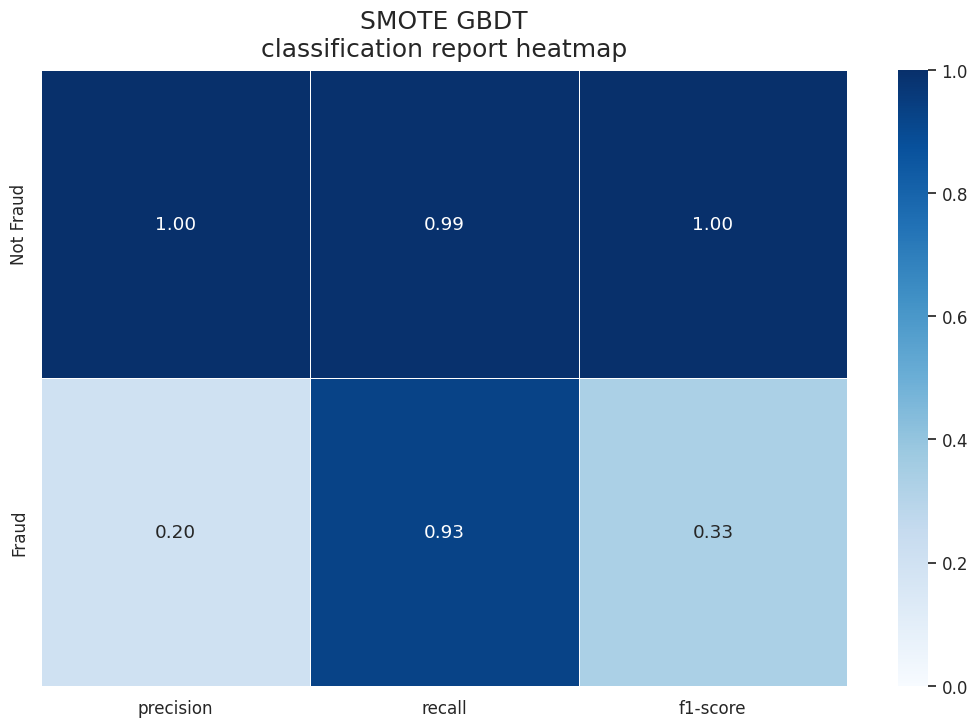

In [ ]:
print(classification_report(y_test, smote_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_smote, model_name)

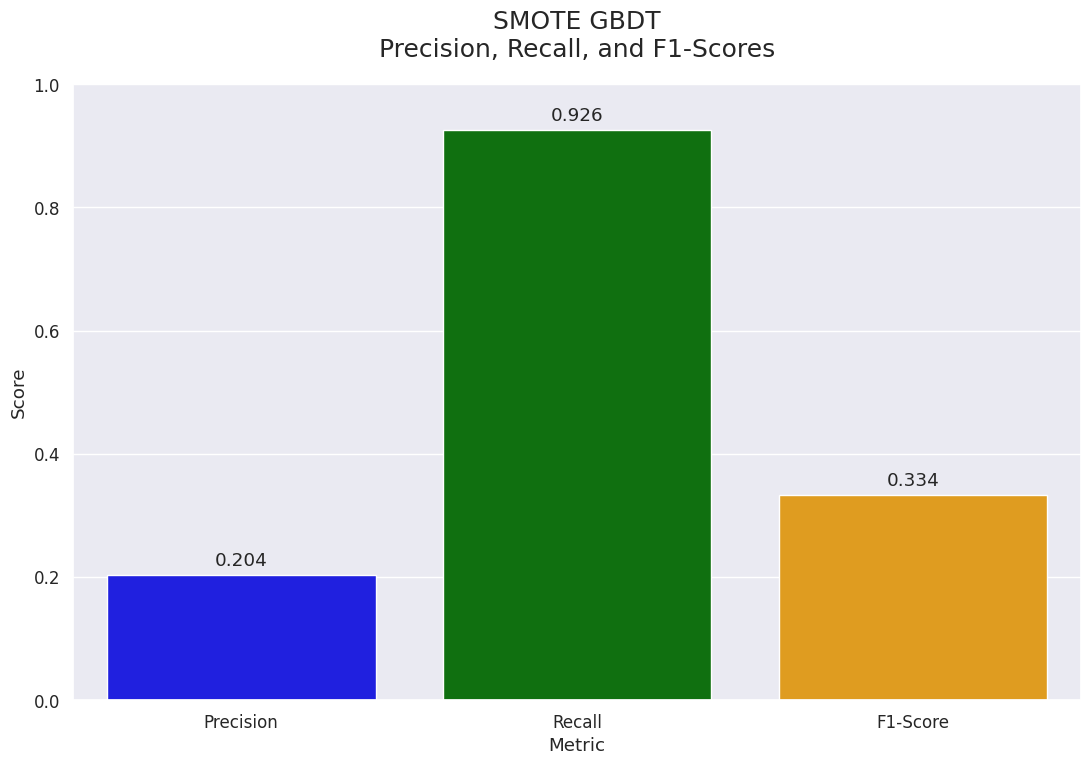

In [ ]:
df_smote = df_smote.drop('Not Fraud', axis=0)
df_smote = df_smote.drop('support', axis=1)

plot_classification_scores(df_smote, model_name)

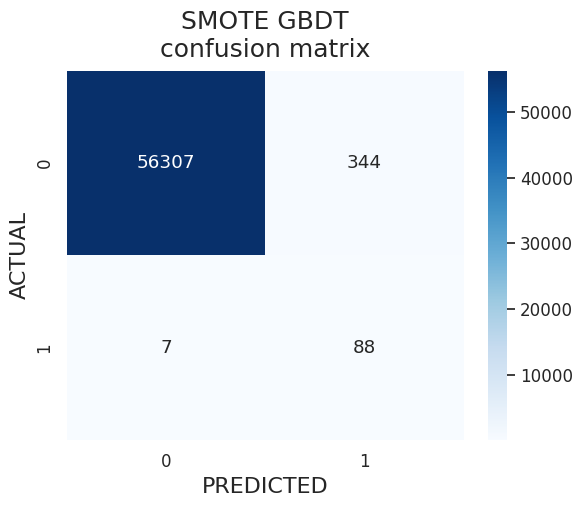

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, smote_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, smote_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, smote_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47
3,SMOTE GBDT,15:16,88,56307,344,7,56395,351,0.204,0.926,0.334,56651,95


In [ ]:
sm = SMOTE(sampling_strategy='auto')

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_smoteTrain, y_smoteTrain = sm.fit_resample(X_train, y_train)

    # Fit the classifier and make predictions
    gbdt.fit(X_smoteTrain, y_smoteTrain)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208
2,Undersampling Majority Class GBDT,0.691 ± 0.074,0.09 ± 0.009,0.971 ± 0.014,0.211 ± 0.01,0.048 ± 0.005,0.975 ± 0.027
3,SMOTE GBDT,0.762 ± 0.055,0.313 ± 0.031,0.93 ± 0.031,0.406 ± 0.022,0.192 ± 0.026,0.871 ± 0.057


###RandomUnderSampler + SMOTE w/ Gradient Boosting Decision Tree Classifier

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

model_name = 'RUS and SMOTE GBDT'

X = df.drop('Class', axis=1)
y = df['Class']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = df.Class)

start_time_1 = time.time()
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Apply SMOTE to the resampled data
smote = SMOTE(random_state=42)
X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_resampled, y_train_resampled)
end_time_1 = time.time()


Class
0    226602
1       378
Name: count, dtype: int64
Class
0    378
1    378
Name: count, dtype: int64


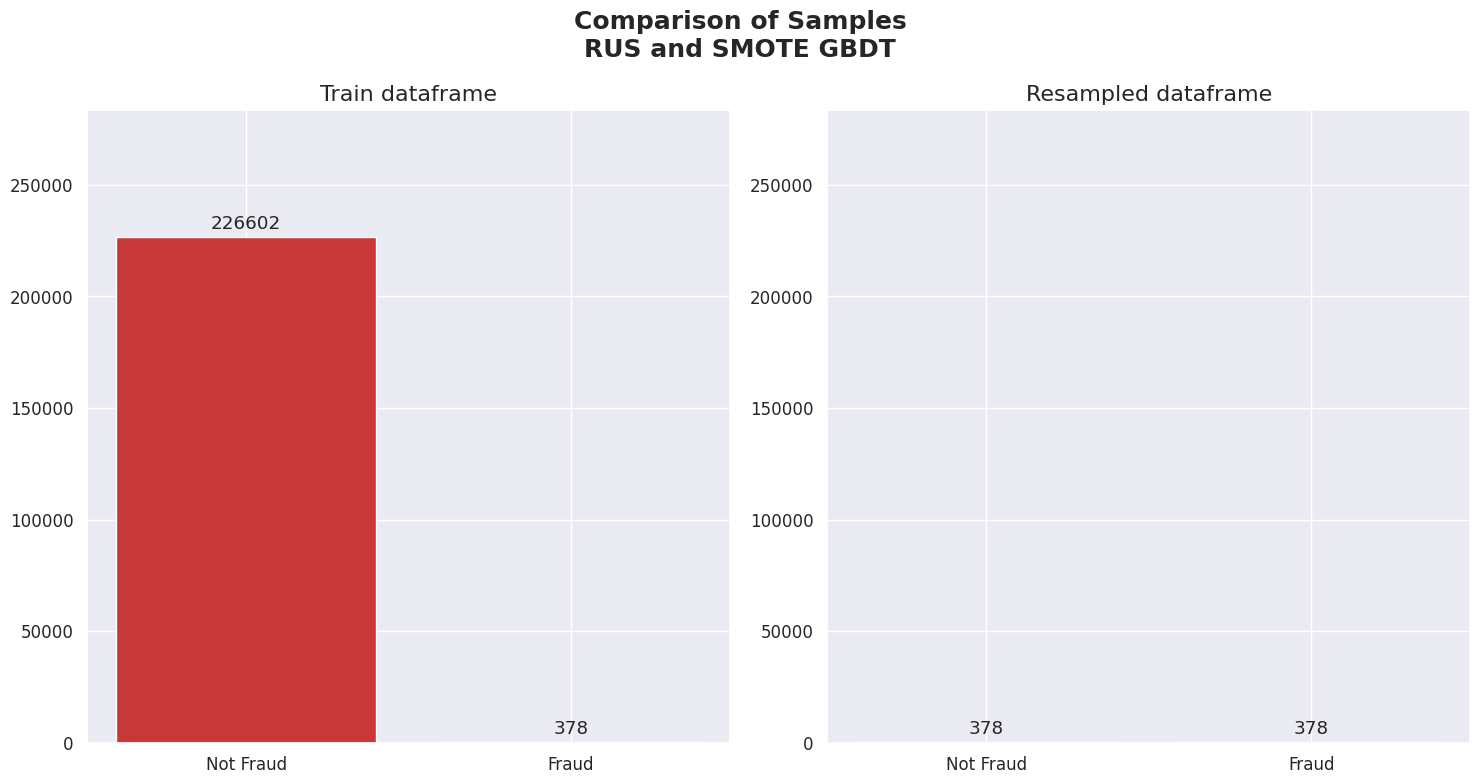

In [ ]:
plot_samples_side_by_side(y_train, y_train_resampled_smote, model_name)

In [ ]:
start_time_2 = time.time()
rus_smote = gbdt.fit(X_train_resampled_smote, y_train_resampled_smote)
end_time_2 = time.time()

execution_time = (end_time_1 - start_time_1) + (end_time_2 - start_time_2)

rus_smote_pred = rus_smote.predict(X_test)

In [ ]:
rus_smote_report = classification_report(y_test, rus_smote_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_rus_smote = pd.DataFrame(rus_smote_report).transpose()
df_rus_smote = df_rus_smote.drop('macro avg', axis=0)
df_rus_smote = df_rus_smote.drop('weighted avg', axis=0)
df_rus_smote = df_rus_smote.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.98     56651
       Fraud       0.03      0.94      0.06        95

    accuracy                           0.95     56746
   macro avg       0.52      0.95      0.52     56746
weighted avg       1.00      0.95      0.97     56746



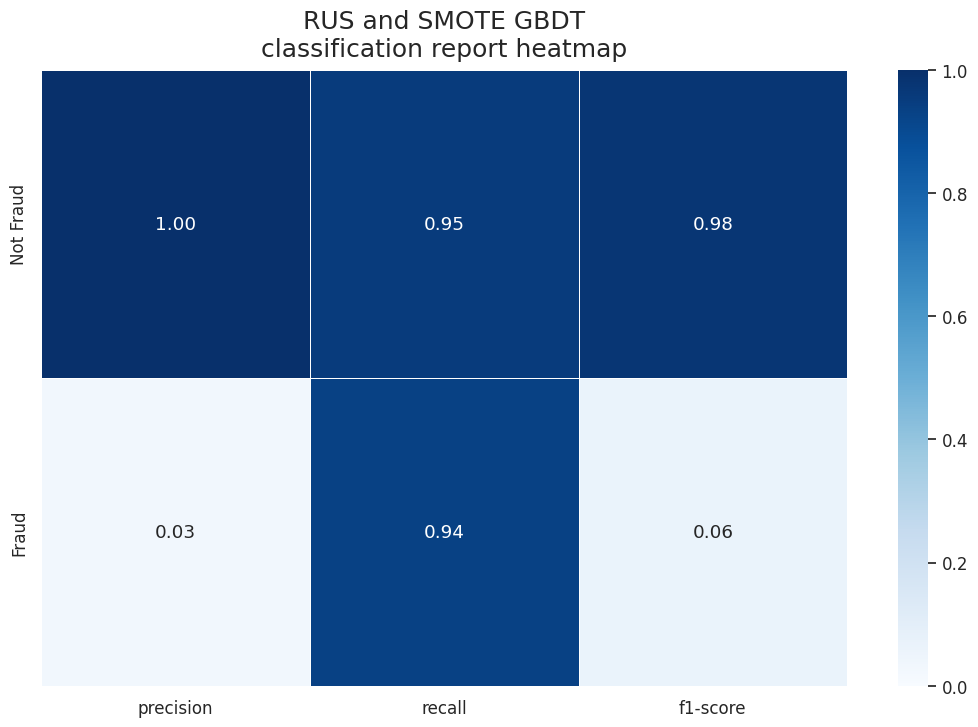

In [ ]:
print(classification_report(y_test, rus_smote_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_rus_smote, model_name)

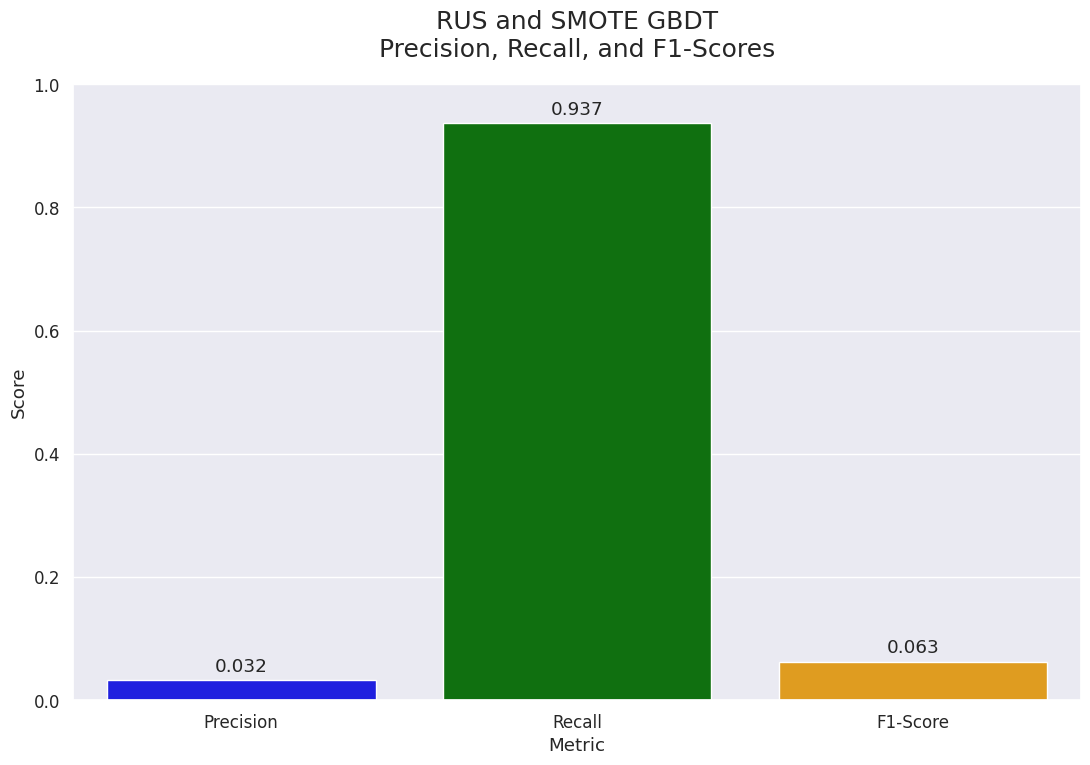

In [ ]:
df_rus_smote = df_rus_smote.drop('Not Fraud', axis=0)
df_rus_smote = df_rus_smote.drop('support', axis=1)

plot_classification_scores(df_rus_smote, model_name)

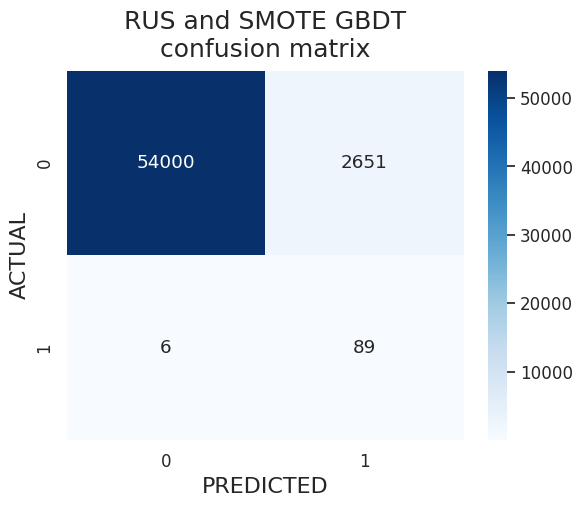

<Figure size 1300x800 with 0 Axes>

In [ ]:
# Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, rus_smote_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rus_smote_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, rus_smote_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47
3,SMOTE GBDT,15:16,88,56307,344,7,56395,351,0.204,0.926,0.334,56651,95
4,RUS and SMOTE GBDT,00:00,89,54000,2651,6,54089,2657,0.032,0.937,0.063,56651,95


In [ ]:
rus = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []
aucprc_scores = []
gmean_scores = []
mcc_scores = []

for train_index, test_index in kf.split(X, y):
    # Split data into training and validation folds
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train_resampled, y_train_resampled)

    # Fit the classifier and make predictions
    gbdt.fit(X_train_resampled_smote, y_train_resampled_smote)
    y_pred = gbdt.predict(X_test)
    y_pred_proba = gbdt.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics for the current fold
    precision, recall, f1, aucprc, gmean, mcc = calculate_metrics(y_test, y_pred, y_pred_proba)

    # Append metrics to the respective lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    aucprc_scores.append(aucprc)
    gmean_scores.append(gmean)
    mcc_scores.append(mcc)

# Calculate the mean classification report across all folds
mean_precision = round(np.mean(precision_scores), 3)
mean_recall = round(np.mean(recall_scores), 3)
mean_f1 = round(np.mean(f1_scores), 3)
mean_aucprc = round(np.mean(aucprc_scores), 3)
mean_gmean = round(np.mean(gmean_scores), 3)
mean_mcc = round(np.mean(mcc_scores), 3)

std_precision = round(np.std(precision_scores), 3)
std_recall = round(np.std(recall_scores), 3)
std_f1 = round(np.std(f1_scores), 3)
std_aucprc = round(np.std(aucprc_scores), 3)
std_gmean = round(np.std(gmean_scores), 3)
std_mcc = round(np.std(mcc_scores), 3)

new_row = {
'model': model_name,
'aucprc': str(mean_aucprc) + ' ± ' + str(std_aucprc),
'f1': str(mean_f1) + ' ± ' + str(std_f1),
'gm': str(mean_gmean) + ' ± ' + str(std_gmean),
'mcc': str(mean_mcc) + ' ± ' + str(std_mcc),
'precision': str(mean_precision) + ' ± ' + str(std_precision),
'recall': str(mean_recall) + ' ± ' + str(std_recall)
}

df_kfold_models = pd.concat([df_kfold_models, pd.DataFrame(new_row, index=[0])], ignore_index=True)
df_kfold_models

,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208
2,Undersampling Majority Class GBDT,0.691 ± 0.074,0.09 ± 0.009,0.971 ± 0.014,0.211 ± 0.01,0.048 ± 0.005,0.975 ± 0.027
3,SMOTE GBDT,0.762 ± 0.055,0.313 ± 0.031,0.93 ± 0.031,0.406 ± 0.022,0.192 ± 0.026,0.871 ± 0.057
4,RUS and SMOTE GBDT,0.577 ± 0.137,0.071 ± 0.011,0.939 ± 0.028,0.179 ± 0.014,0.037 ± 0.006,0.92 ± 0.054


## Self-paced Ensemble w/ GBDT n = 10

In [ ]:
from imbens.ensemble import SelfPacedEnsembleClassifier

model_name = 'Self-paced Ensemble w/ GBDT n=10'

SPE_gbdt_clf = SelfPacedEnsembleClassifier(
        estimator=gbdt,
        n_estimators=10,
        random_state = RANDOM_STATE
        )

start_time = time.time()
SPE_gbdt_clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

SPE_gbdt_pred = SPE_gbdt_clf.predict(X_test)

In [ ]:
SPE_gbdt_report = classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_SPE_gbdt = pd.DataFrame(SPE_gbdt_report).transpose()
df_SPE_gbdt = df_SPE_gbdt.drop('macro avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('weighted avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28323
       Fraud       0.83      0.80      0.81        49

    accuracy                           1.00     28372
   macro avg       0.91      0.90      0.91     28372
weighted avg       1.00      1.00      1.00     28372



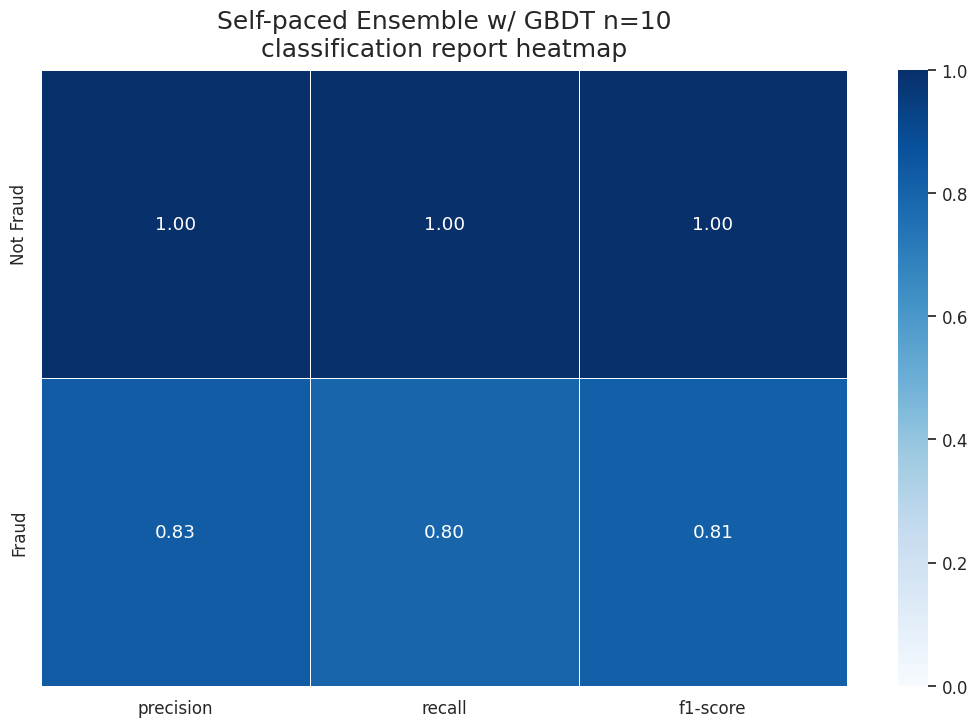

In [ ]:
print(classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_SPE_gbdt, model_name)

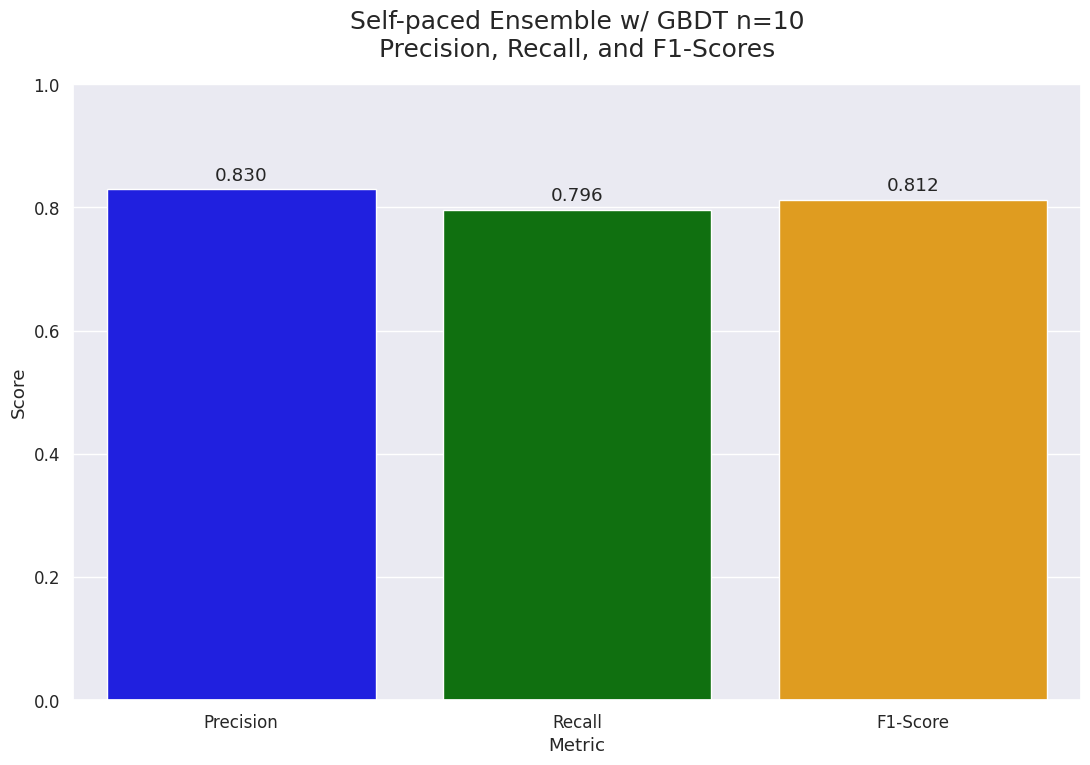

In [ ]:
df_SPE_gbdt = df_SPE_gbdt.drop('Not Fraud', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('support', axis=1)

plot_classification_scores(df_SPE_gbdt, model_name)

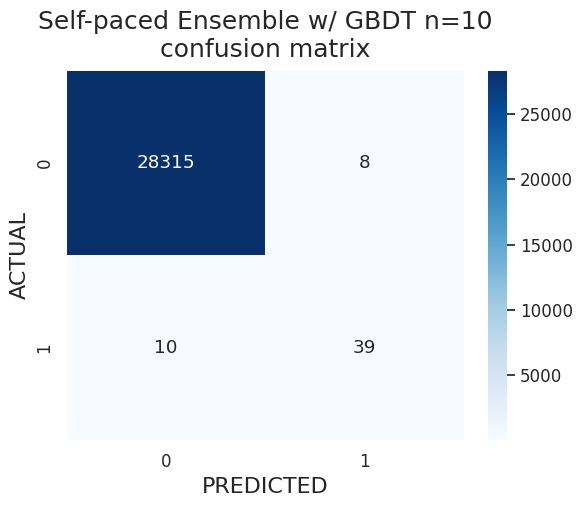

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, SPE_gbdt_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, SPE_gbdt_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, SPE_gbdt_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47
3,SMOTE GBDT,15:16,88,56307,344,7,56395,351,0.204,0.926,0.334,56651,95
4,RUS and SMOTE GBDT,00:00,89,54000,2651,6,54089,2657,0.032,0.937,0.063,56651,95
5,Self-paced Ensemble w/ GBDT n=10,00:16,39,28315,8,10,28354,18,0.830,0.796,0.812,28323,49


In [ ]:
df_kfold_models = kfold_classifier(model_name, SPE_gbdt_clf, X, y, df_kfold_models)
df_kfold_models

[0.857, 0.822, 0.857, 0.896, 0.917, 0.828, 0.828, 0.812, 0.854, 0.87]


,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208
2,Undersampling Majority Class GBDT,0.691 ± 0.074,0.09 ± 0.009,0.971 ± 0.014,0.211 ± 0.01,0.048 ± 0.005,0.975 ± 0.027
3,SMOTE GBDT,0.762 ± 0.055,0.313 ± 0.031,0.93 ± 0.031,0.406 ± 0.022,0.192 ± 0.026,0.871 ± 0.057
4,RUS and SMOTE GBDT,0.577 ± 0.137,0.071 ± 0.011,0.939 ± 0.028,0.179 ± 0.014,0.037 ± 0.006,0.92 ± 0.054
5,Self-paced Ensemble w/ GBDT n=10,0.851 ± 0.05,0.854 ± 0.032,0.909 ± 0.027,0.855 ± 0.031,0.886 ± 0.034,0.827 ± 0.05


## Self-paced Ensemble w/ GBDT n = 20

In [ ]:
from imbens.ensemble import SelfPacedEnsembleClassifier

model_name = 'Self-paced Ensemble w/ GBDT n=20'

SPE_gbdt_clf = SelfPacedEnsembleClassifier(
        estimator=gbdt,
        n_estimators=20,
        random_state = RANDOM_STATE
        )

start_time = time.time()
SPE_gbdt_clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

SPE_gbdt_pred = SPE_gbdt_clf.predict(X_test)

In [ ]:
SPE_gbdt_report = classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_SPE_gbdt = pd.DataFrame(SPE_gbdt_report).transpose()
df_SPE_gbdt = df_SPE_gbdt.drop('macro avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('weighted avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28323
       Fraud       0.85      0.80      0.82        49

    accuracy                           1.00     28372
   macro avg       0.92      0.90      0.91     28372
weighted avg       1.00      1.00      1.00     28372



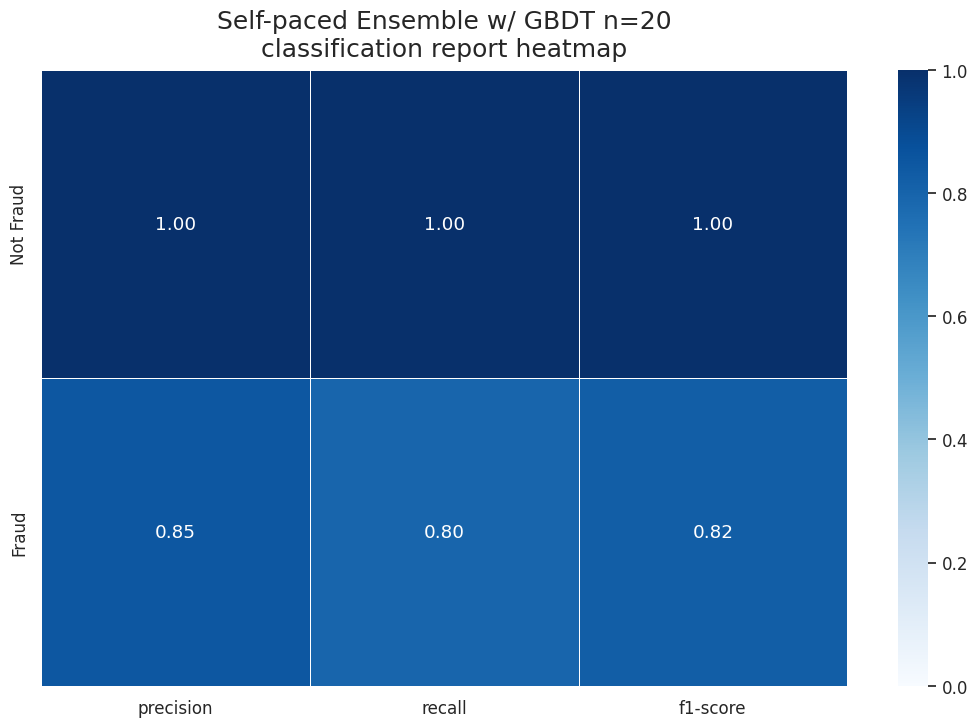

In [ ]:
print(classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_SPE_gbdt, model_name)

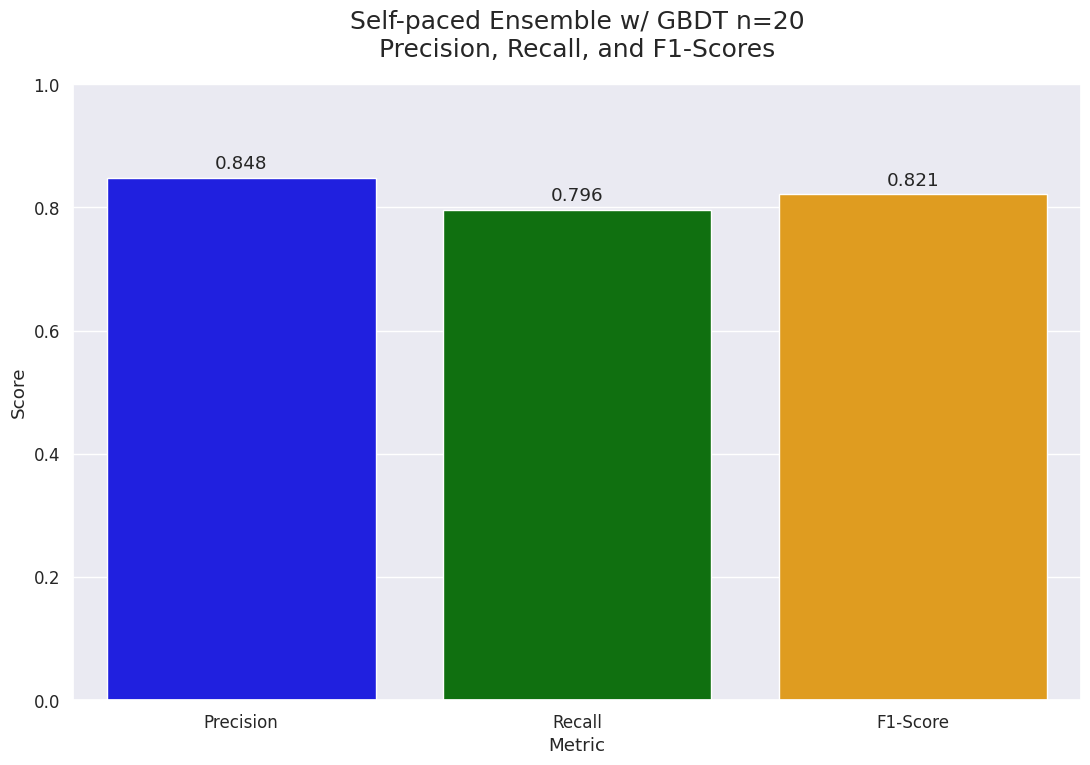

In [ ]:
df_SPE_gbdt = df_SPE_gbdt.drop('Not Fraud', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('support', axis=1)

plot_classification_scores(df_SPE_gbdt, model_name)

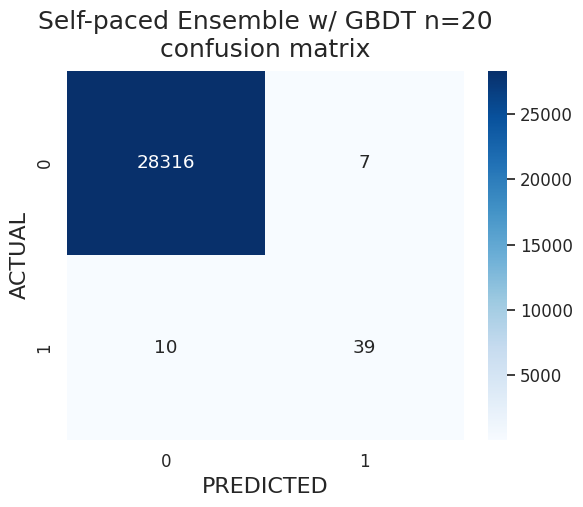

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, SPE_gbdt_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, SPE_gbdt_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, SPE_gbdt_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47
3,SMOTE GBDT,15:16,88,56307,344,7,56395,351,0.204,0.926,0.334,56651,95
4,RUS and SMOTE GBDT,00:00,89,54000,2651,6,54089,2657,0.032,0.937,0.063,56651,95
5,Self-paced Ensemble w/ GBDT n=10,00:16,39,28315,8,10,28354,18,0.830,0.796,0.812,28323,49
6,Self-paced Ensemble w/ GBDT n=20,00:28,39,28316,7,10,28355,17,0.848,0.796,0.821,28323,49


In [ ]:
df_kfold_models = kfold_classifier(model_name, SPE_gbdt_clf, X, y, df_kfold_models)
df_kfold_models

[0.921, 0.945, 0.86, 0.854, 0.841, 0.876, 0.833, 0.813, 0.913, 0.857]


,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208
2,Undersampling Majority Class GBDT,0.691 ± 0.074,0.09 ± 0.009,0.971 ± 0.014,0.211 ± 0.01,0.048 ± 0.005,0.975 ± 0.027
3,SMOTE GBDT,0.762 ± 0.055,0.313 ± 0.031,0.93 ± 0.031,0.406 ± 0.022,0.192 ± 0.026,0.871 ± 0.057
4,RUS and SMOTE GBDT,0.577 ± 0.137,0.071 ± 0.011,0.939 ± 0.028,0.179 ± 0.014,0.037 ± 0.006,0.92 ± 0.054
5,Self-paced Ensemble w/ GBDT n=10,0.851 ± 0.05,0.854 ± 0.032,0.909 ± 0.027,0.855 ± 0.031,0.886 ± 0.034,0.827 ± 0.05
6,Self-paced Ensemble w/ GBDT n=20,0.856 ± 0.037,0.871 ± 0.04,0.909 ± 0.029,0.873 ± 0.04,0.923 ± 0.042,0.827 ± 0.053


## Self-paced Ensemble w/ GBDT n = 50

In [ ]:
from imbens.ensemble import SelfPacedEnsembleClassifier

model_name = 'Self-paced Ensemble w/ GBDT n=50'

SPE_gbdt_clf = SelfPacedEnsembleClassifier(
        estimator=gbdt,
        n_estimators=50,
        random_state = RANDOM_STATE
        )

start_time = time.time()
SPE_gbdt_clf.fit(X_train, y_train)
end_time = time.time()

execution_time = end_time - start_time

SPE_gbdt_pred = SPE_gbdt_clf.predict(X_test)

In [ ]:
SPE_gbdt_report = classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud'], output_dict=True)
df_SPE_gbdt = pd.DataFrame(SPE_gbdt_report).transpose()
df_SPE_gbdt = df_SPE_gbdt.drop('macro avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('weighted avg', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('accuracy', axis=0)

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     28323
       Fraud       0.89      0.80      0.84        49

    accuracy                           1.00     28372
   macro avg       0.94      0.90      0.92     28372
weighted avg       1.00      1.00      1.00     28372



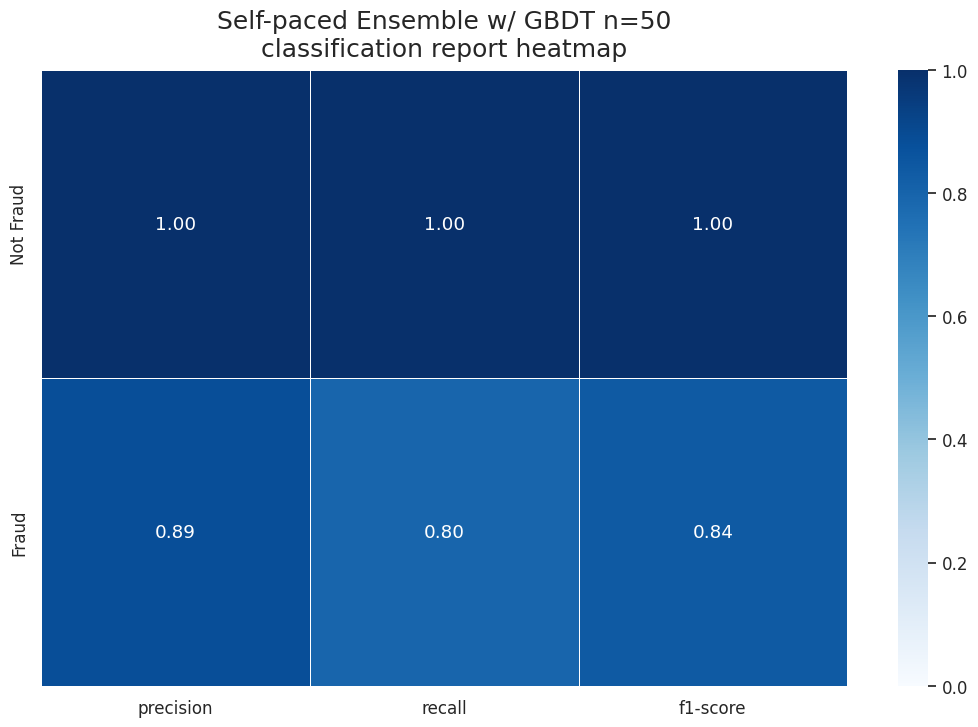

In [ ]:
print(classification_report(y_test, SPE_gbdt_pred, target_names=['Not Fraud','Fraud']))

plot_classification_report_heatmap(df_SPE_gbdt, model_name)

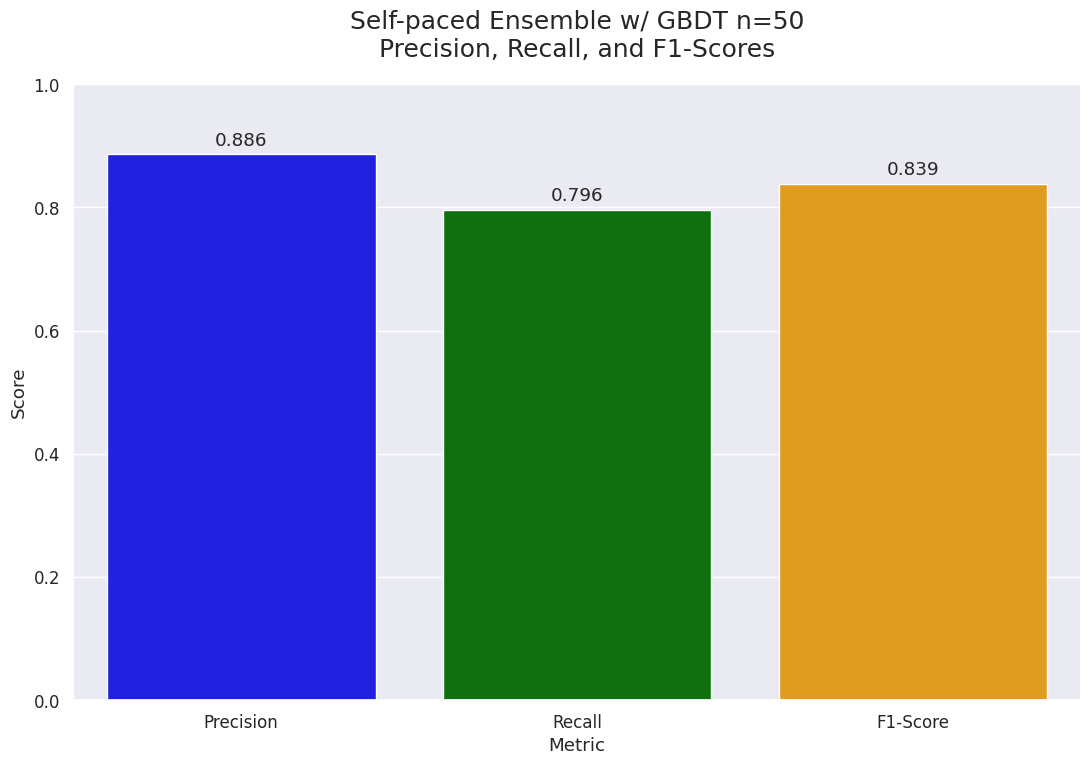

In [ ]:
df_SPE_gbdt = df_SPE_gbdt.drop('Not Fraud', axis=0)
df_SPE_gbdt = df_SPE_gbdt.drop('support', axis=1)

plot_classification_scores(df_SPE_gbdt, model_name)

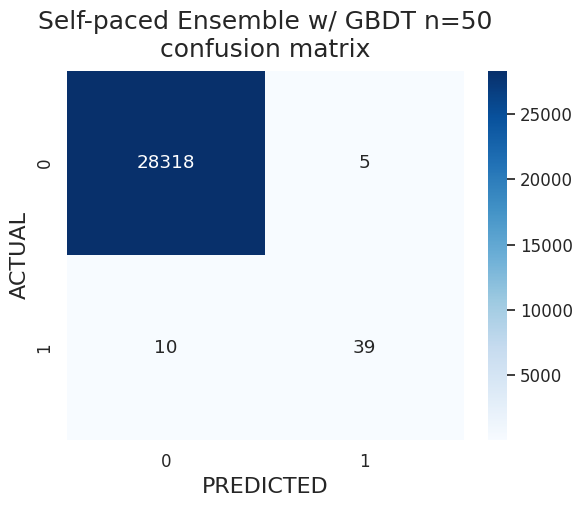

<Figure size 1300x800 with 0 Axes>

In [ ]:
## Confusion Matrix HeatMap
display.display(confusion_plot(confusion_matrix(y_test, SPE_gbdt_pred),
                               model_name,
                               labels=confusion_labels))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, SPE_gbdt_pred).ravel()
df_models = append_model_to_table(tn, fp, fn, tp, SPE_gbdt_report, model_name, execution_time, df_models)
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47
3,SMOTE GBDT,15:16,88,56307,344,7,56395,351,0.204,0.926,0.334,56651,95
4,RUS and SMOTE GBDT,00:00,89,54000,2651,6,54089,2657,0.032,0.937,0.063,56651,95
5,Self-paced Ensemble w/ GBDT n=10,00:16,39,28315,8,10,28354,18,0.830,0.796,0.812,28323,49
6,Self-paced Ensemble w/ GBDT n=20,00:28,39,28316,7,10,28355,17,0.848,0.796,0.821,28323,49
7,Self-paced Ensemble w/ GBDT n=50,01:12,39,28318,5,10,28357,15,0.886,0.796,0.839,28323,49


In [ ]:
df_kfold_models = kfold_classifier(model_name, SPE_gbdt_clf, X, y, df_kfold_models)
df_kfold_models

[0.911, 0.891, 0.874, 0.884, 0.884, 0.884, 0.843, 0.874, 0.884, 0.775]


,model,aucprc,f1,gm,mcc,precision,recall
0,Gradient Boosting Decision Tree,0.498 ± 0.232,0.57 ± 0.232,0.67 ± 0.196,0.591 ± 0.212,0.746 ± 0.142,0.488 ± 0.245
1,Oversampling Minority Class GBDT,0.495 ± 0.203,0.569 ± 0.192,0.669 ± 0.158,0.592 ± 0.177,0.764 ± 0.131,0.473 ± 0.208
2,Undersampling Majority Class GBDT,0.691 ± 0.074,0.09 ± 0.009,0.971 ± 0.014,0.211 ± 0.01,0.048 ± 0.005,0.975 ± 0.027
3,SMOTE GBDT,0.762 ± 0.055,0.313 ± 0.031,0.93 ± 0.031,0.406 ± 0.022,0.192 ± 0.026,0.871 ± 0.057
4,RUS and SMOTE GBDT,0.577 ± 0.137,0.071 ± 0.011,0.939 ± 0.028,0.179 ± 0.014,0.037 ± 0.006,0.92 ± 0.054
5,Self-paced Ensemble w/ GBDT n=10,0.851 ± 0.05,0.854 ± 0.032,0.909 ± 0.027,0.855 ± 0.031,0.886 ± 0.034,0.827 ± 0.05
6,Self-paced Ensemble w/ GBDT n=20,0.856 ± 0.037,0.871 ± 0.04,0.909 ± 0.029,0.873 ± 0.04,0.923 ± 0.042,0.827 ± 0.053
7,Self-paced Ensemble w/ GBDT n=50,0.851 ± 0.053,0.87 ± 0.036,0.904 ± 0.039,0.873 ± 0.032,0.933 ± 0.03,0.82 ± 0.068


## Results Comparison

In [ ]:
from google.colab import files
df_kfold_models.to_csv('df_CreditFraud_kfold_gbdt.csv', index=False)  # Set index=False to exclude the index column in the CSV

# Download the CSV file
files.download('df_CreditFraud_kfold_gbdt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_models.to_csv('df_CreditFraud_gbdt.csv', index=False)  # Set index=False to exclude the index column in the CSV

# Download the CSV file
files.download('df_CreditFraud_gbdt.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_models

,model,execution_Time,tp,tn,fp,fn,correct,incorrect,precision,recall,f1,support_Not_Fraud,support_Fraud
0,Gradient Boosting Decision Tree,07:20,43,56641,10,52,56684,62,0.453,0.811,0.581,56693,53
1,Oversampling Minority Class GBDT,09:16,81,56291,360,14,56372,374,0.184,0.853,0.302,56651,95
2,Undersampling Majority Class GBDT,00:00,46,27431,894,1,27477,895,0.049,0.979,0.093,28325,47
3,SMOTE GBDT,15:16,88,56307,344,7,56395,351,0.204,0.926,0.334,56651,95
4,RUS and SMOTE GBDT,00:00,89,54000,2651,6,54089,2657,0.032,0.937,0.063,56651,95
5,Self-paced Ensemble w/ GBDT n=10,00:16,39,28315,8,10,28354,18,0.830,0.796,0.812,28323,49
6,Self-paced Ensemble w/ GBDT n=20,00:28,39,28316,7,10,28355,17,0.848,0.796,0.821,28323,49
7,Self-paced Ensemble w/ GBDT n=50,01:12,39,28318,5,10,28357,15,0.886,0.796,0.839,28323,49


In [ ]:
result = df_models.iloc[:, [ 0, 8, 9, 10]]
result

,model,precision,recall,f1
0,Gradient Boosting Decision Tree,0.453,0.811,0.581
1,Oversampling Minority Class GBDT,0.184,0.853,0.302
2,Undersampling Majority Class GBDT,0.049,0.979,0.093
3,SMOTE GBDT,0.204,0.926,0.334
4,RUS and SMOTE GBDT,0.032,0.937,0.063
5,Self-paced Ensemble w/ GBDT n=10,0.830,0.796,0.812
6,Self-paced Ensemble w/ GBDT n=20,0.848,0.796,0.821
7,Self-paced Ensemble w/ GBDT n=50,0.886,0.796,0.839


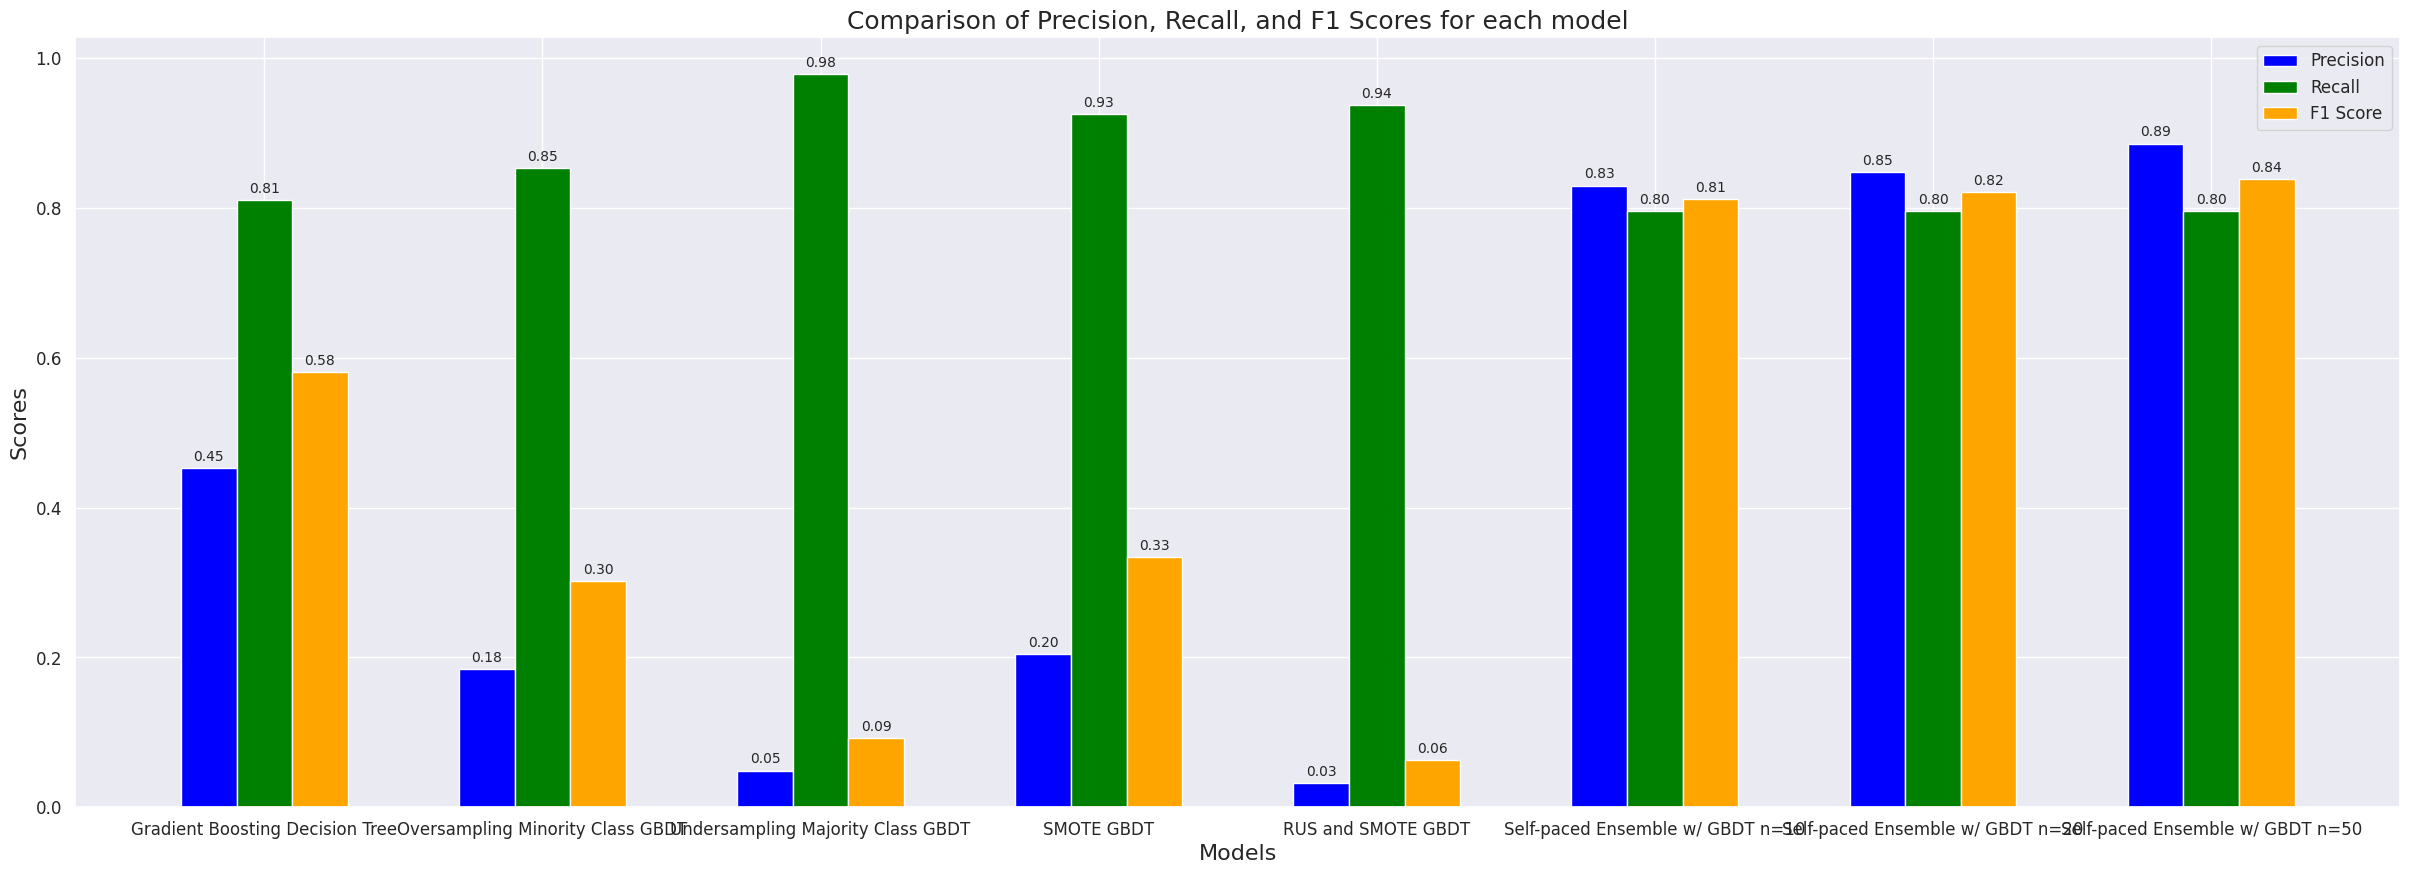

In [ ]:
classification_scores_comparison(result)

In [ ]:
result_f1_scores = result.iloc[:,[0, 3]]
result_f1_scores_sorted = result_f1_scores.sort_values(by='f1', ascending=True)

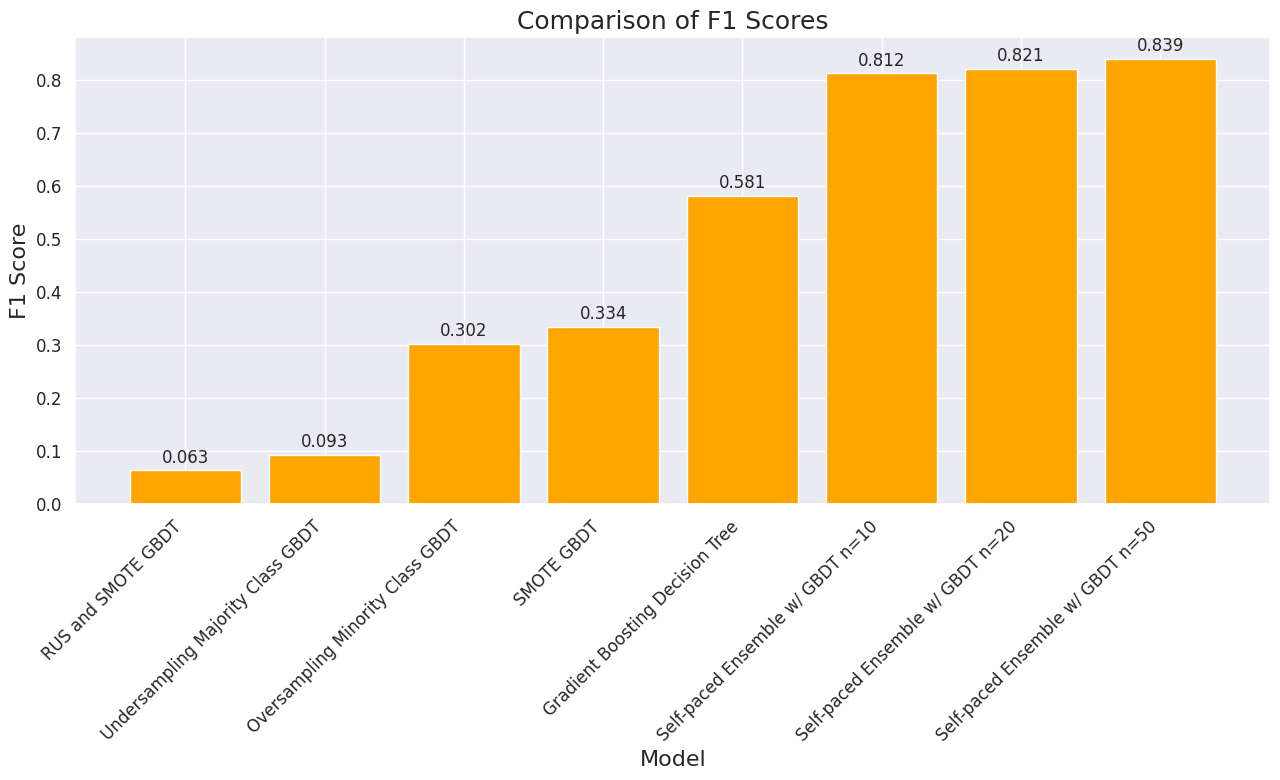

In [ ]:
plot_compare_f1_scores(result_f1_scores_sorted)

In [ ]:
df_models_executionTime = df_models.iloc[:, [ 0, 1]]
df_models_executionTime

,model,execution_Time
0,Gradient Boosting Decision Tree,07:20
1,Oversampling Minority Class GBDT,09:16
2,Undersampling Majority Class GBDT,00:00
3,SMOTE GBDT,15:16
4,RUS and SMOTE GBDT,00:00
5,Self-paced Ensemble w/ GBDT n=10,00:16
6,Self-paced Ensemble w/ GBDT n=20,00:28
7,Self-paced Ensemble w/ GBDT n=50,01:12


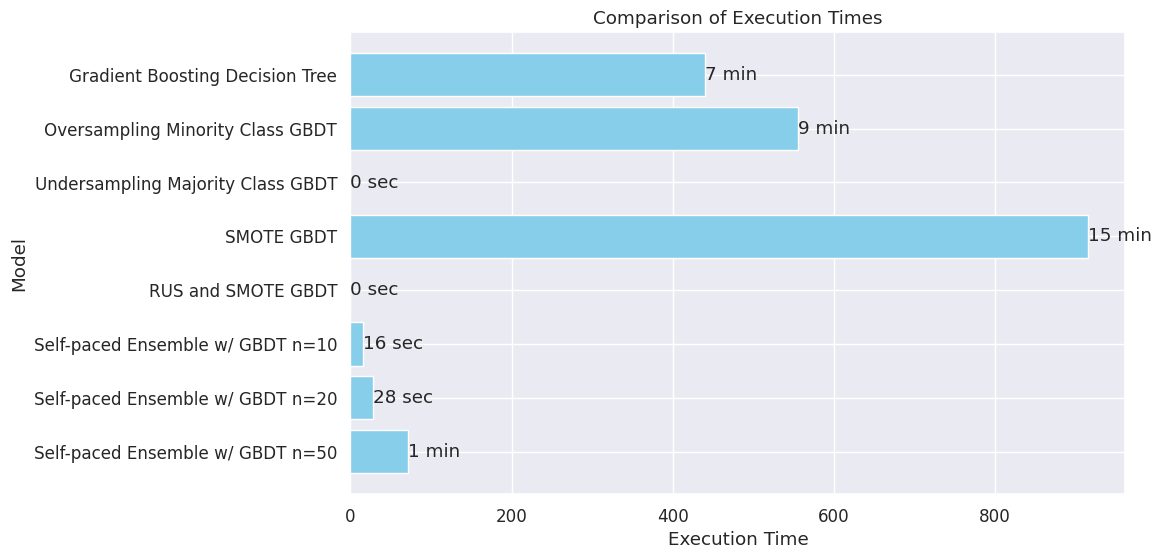

In [ ]:
# Convert time strings to seconds
def time_str_to_seconds(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

df_models_executionTime['execution_Seconds'] = [time_str_to_seconds(time) for time in df_models_executionTime['execution_Time']]

# Plot the bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(df_models_executionTime['model'], df_models_executionTime['execution_Seconds'], color='skyblue')

# Annotate each bar with its value
for bar, value in zip(bars, df_models_executionTime['execution_Seconds']):
    if value < 60:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.0f} sec',
                 va='center', ha='left')
    else:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value/60:.0f} min',
                 va='center', ha='left')

plt.xlabel('Execution Time')
plt.ylabel('Model')
plt.title('Comparison of Execution Times')
plt.gca().invert_yaxis()  # Invert y-axis to display the longest time at the top
plt.show()

# Two-tailed unpaired t-test at 95% confidence interval

In [ ]:
from scipy.stats import ttest_ind

# F1 scores of Self-paced Ensemble Classifier with base XGBoost
f1_scores_base_rf = [0.86, 0.8, 0.857, 0.901, 0.833, 0.835, 0.905, 0.87, 0.826, 0.863]  # Your F1 scores here

# F1 scores of Self-paced Ensemble Classifier with itself
f1_scores_self_paced_ensemble = [0.716, 0.703, 0.686, 0.71, 0.605, 0.729, 0.733, 0.672, 0.661, 0.614]  # Your F1 scores here

# Perform the t-test
t_stat, p_value = ttest_ind(f1_scores_base_rf, f1_scores_self_paced_ensemble)

# Check the p-value to determine significance
alpha = 0.05  # Significance level
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

1.293846700361067e-08
Reject the null hypothesis: There is a significant difference between the groups.


# mannwhitneyu

In [ ]:
from scipy.stats import mannwhitneyu

# F1 scores of Self-paced Ensemble Classifier with base XGBoost
f1_scores_base_xgb = [0.842, 0.925, 0.879, 0.889, 0.872, 0.851, 0.878, 0.851, 0.894, 0.87]  # Your F1 scores here

# F1 scores of Self-paced Ensemble Classifier with itself
f1_scores_self_paced_ensemble = [0.622, 0.667, 0.661, 0.667, 0.775, 0.721, 0.566, 0.652, 0.603, 0.694]  # Your F1 scores here

# Perform the t-test
U1, p = mannwhitneyu(f1_scores_base_xgb, f1_scores_self_paced_ensemble)

print(U1)
print(p)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

100.0
0.0001806347208075351
Reject the null hypothesis: There is a significant difference between the groups.


Self-Paced Ensemble XGBoost

Self-Paced Ensemble XGBoost vs K-Nearest Neighbors (KNN)
*   AUCPRC: 0.864±0.024  >  0.752±0.018 paper
*   F1-Score: 0.877±0.026  >  0.843±0.016 paper
*   GM: 0.914±0.017  >  0.852±0.002 paper
*   MCC: 0.879±0.026  >  0.855±0.006 paper
*   Precision: 0.925±0.038 (no mencionado en el paper)
*   Recall: 0.835±0.030 (no mencionado en el paper)

Self-Paced Ensemble XGBoost vs Decision Tree (DT)
*   AUCPRC: 0.864±0.051  >  0.783±0.0158 paper
*   F1-Score: 0.877±0.026  >  0.838±0.021 paper
*   GM: 0.914±0.017  >  0.843±0.007 paper
*   MCC: 0.879±0.026  >  0.831±0.008 paper
*   Precision: 0.925±0.038 (no mencionado en el paper)
*   Recall: 0.835±0.030 (no mencionado en el paper)

Self-Paced Ensemble XGBoost vs Multi-Layer Perceptron (MLP)
*   AUCPRC: 0.864±0.051  >  0.747±0.011 paper
*   F1-Score: 0.877±0.026  >  0.811±0.010 paper
*   GM: 0.914±0.017  >  0.828±0.003 paper
*   MCC: 0.879±0.026  >  0.826±0.008 paper
*   Precision: 0.925±0.038 (no mencionado en el paper)
*   Recall: 0.835±0.030 (no mencionado en el paper)

